
# <span style="color:rgb(213,80,0)">This file creates Figures 8.19-8.20, 8.22, 8.26-8.28.</span>

352 imports of FFP2 and FFP3 masks (product 6307909810) into the European Union extracted in a day of November.

## Data loading

In [1]:
load facemasks.mat
y=facemasks.V;
X=[facemasks.W facemasks.SU];

n = size(y,1);
prin=0;
gcp();
pctRunOnAll warning('off', 'all');

## Create Figure 8.19


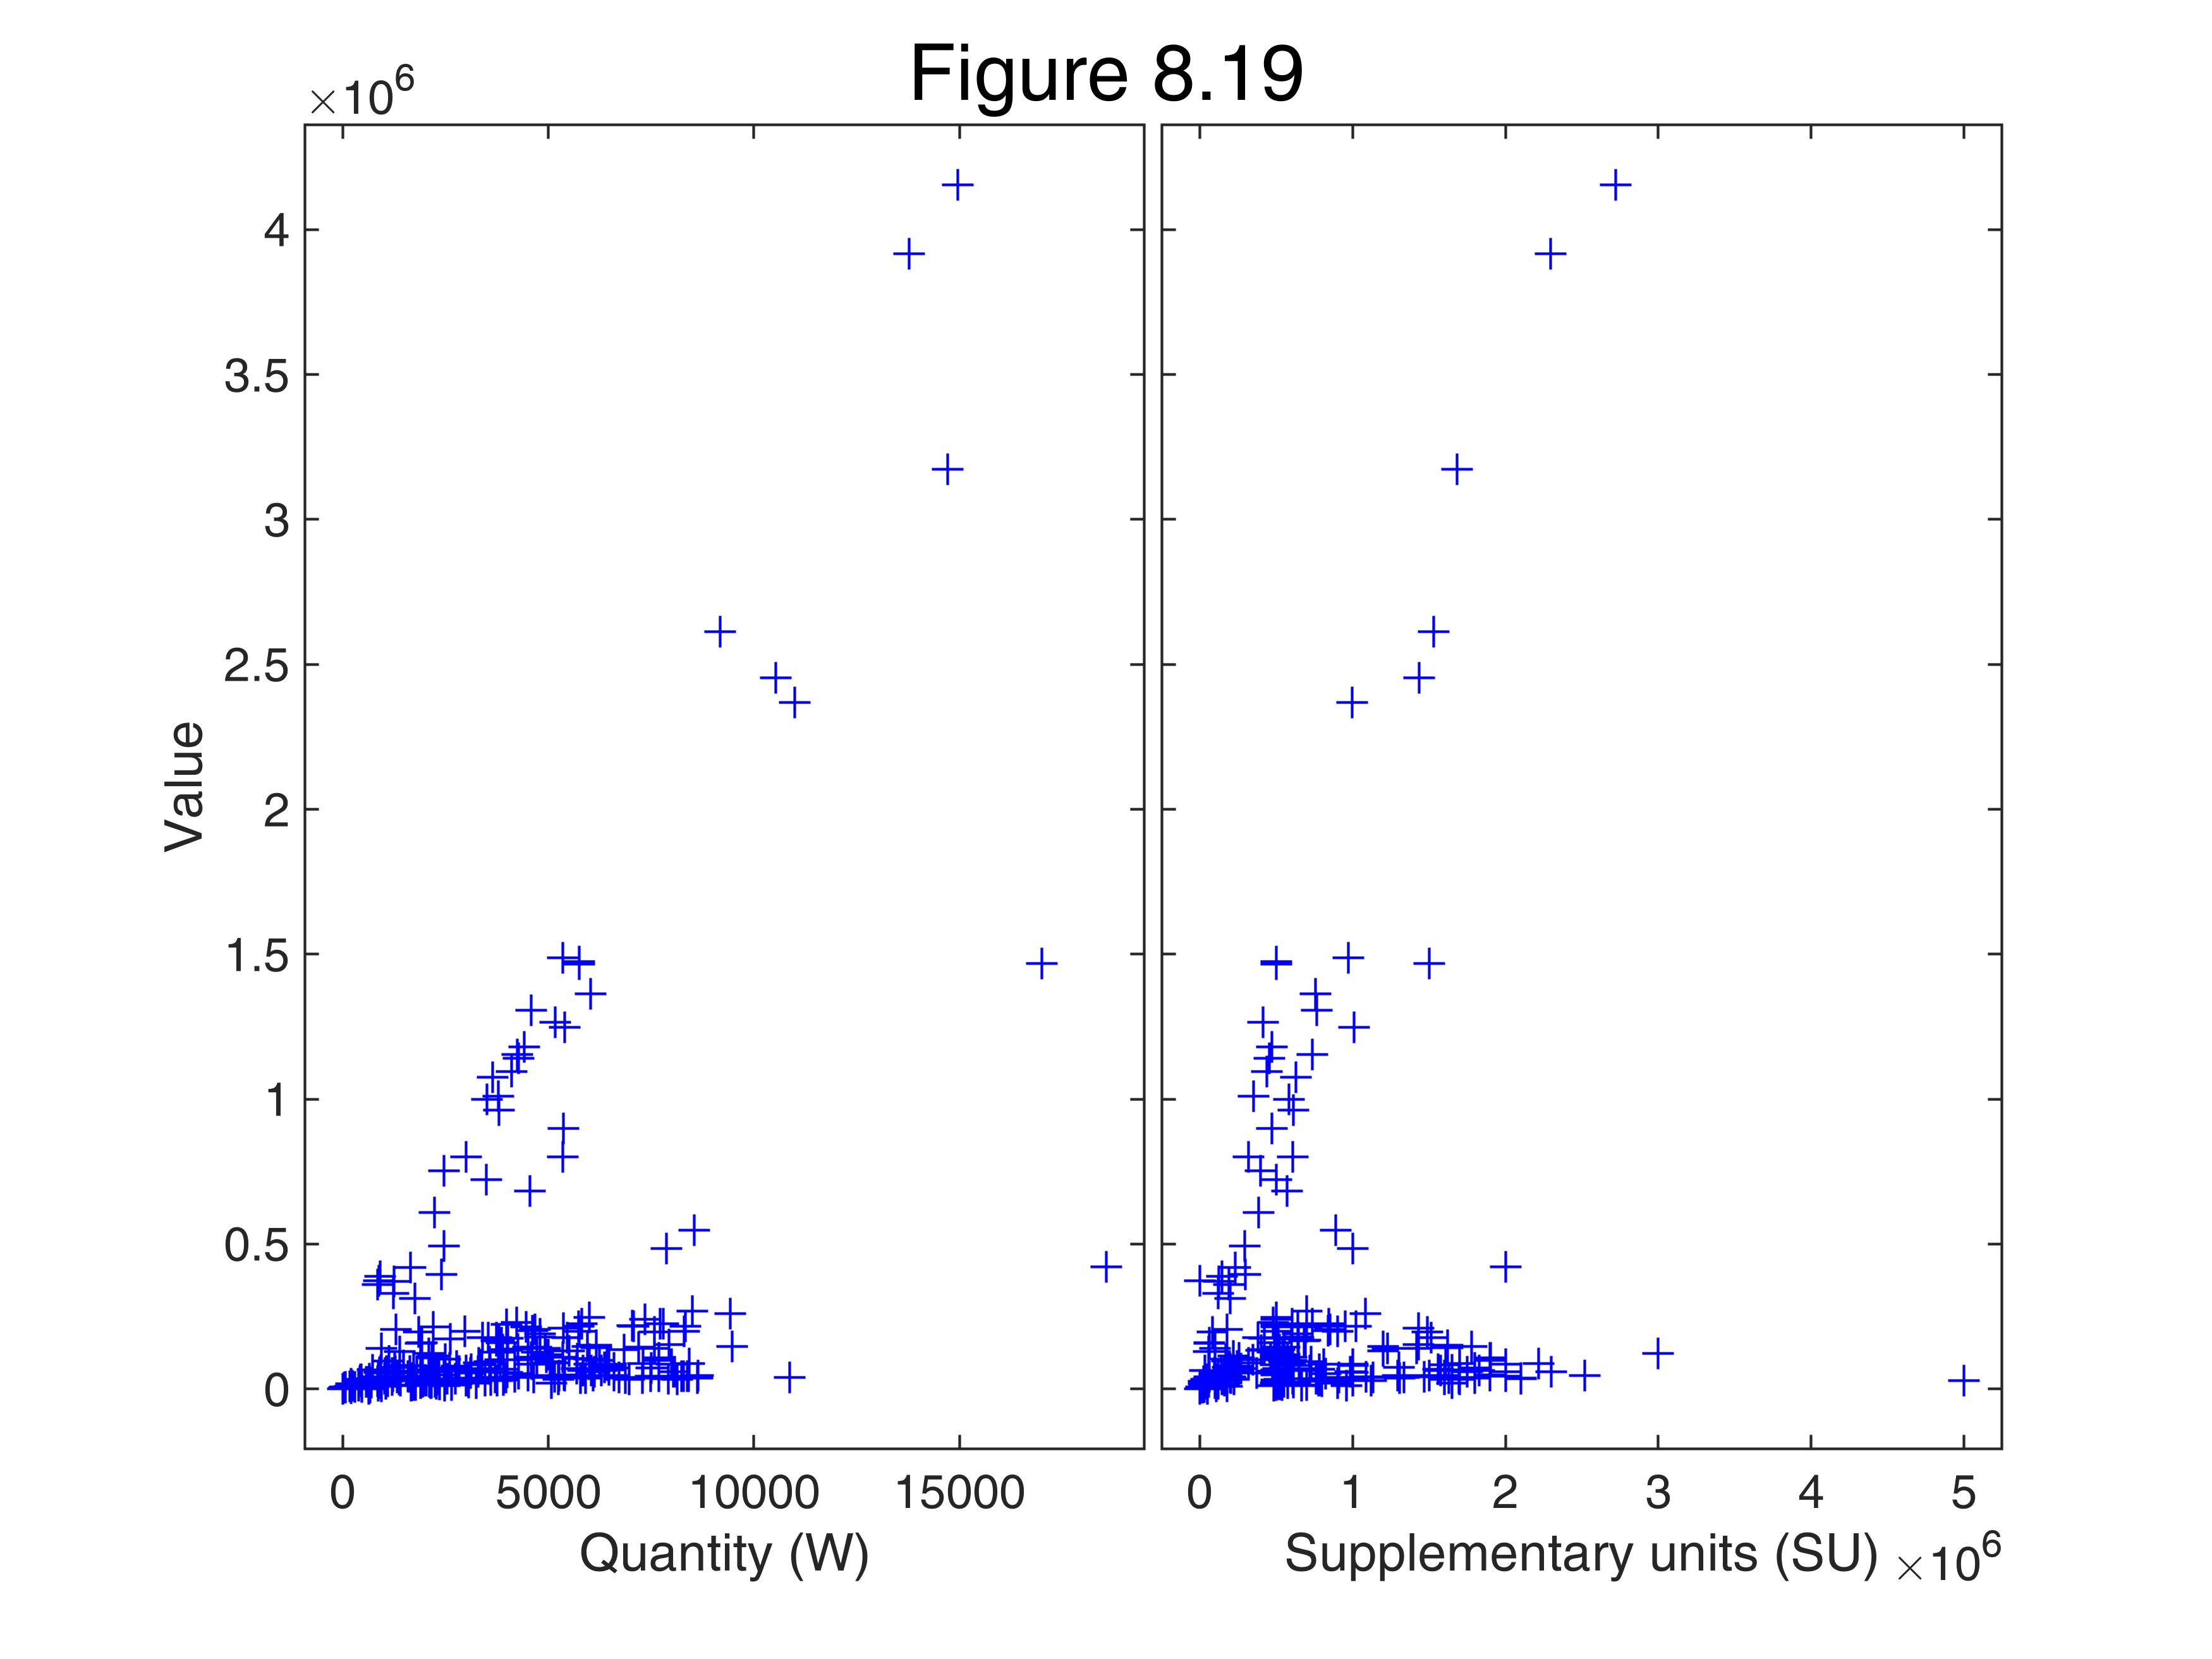

In [2]:
plo=struct;
plo.namey='Value';
plo.nameX={'Quantity (W)', 'Supplementary units (SU)'};
yXplot(y,X,'plo',plo);
legend('off')

if prin==1
    % print to postscript
    print -depsc P6307909810_SP.eps;
end

set(gcf,'Name', 'Figure 8.19');
sgtitle('Figure 8.19')

In [3]:
drawnow;

## Create Figure 8.20

Random start The trajectories are unstable at the beginning, but converge quickly to a reduced number of trajectories in the central part. The instability generates many messages of 'Warning: Value of S2 at step 10 is zero, mdr is NaN'


In [4]:
[outFM0]=FSRmdrrs(y,X,'init',3,'intercept',0,'nsimul',500,'plots',0,'numpool',0);

Simul nr. 50 n=352
Simul nr. 125 n=352
Simul nr. 250 n=352
Simul nr. 375 n=352
Total time required by the multiple start monitoring: 12.3398 seconds


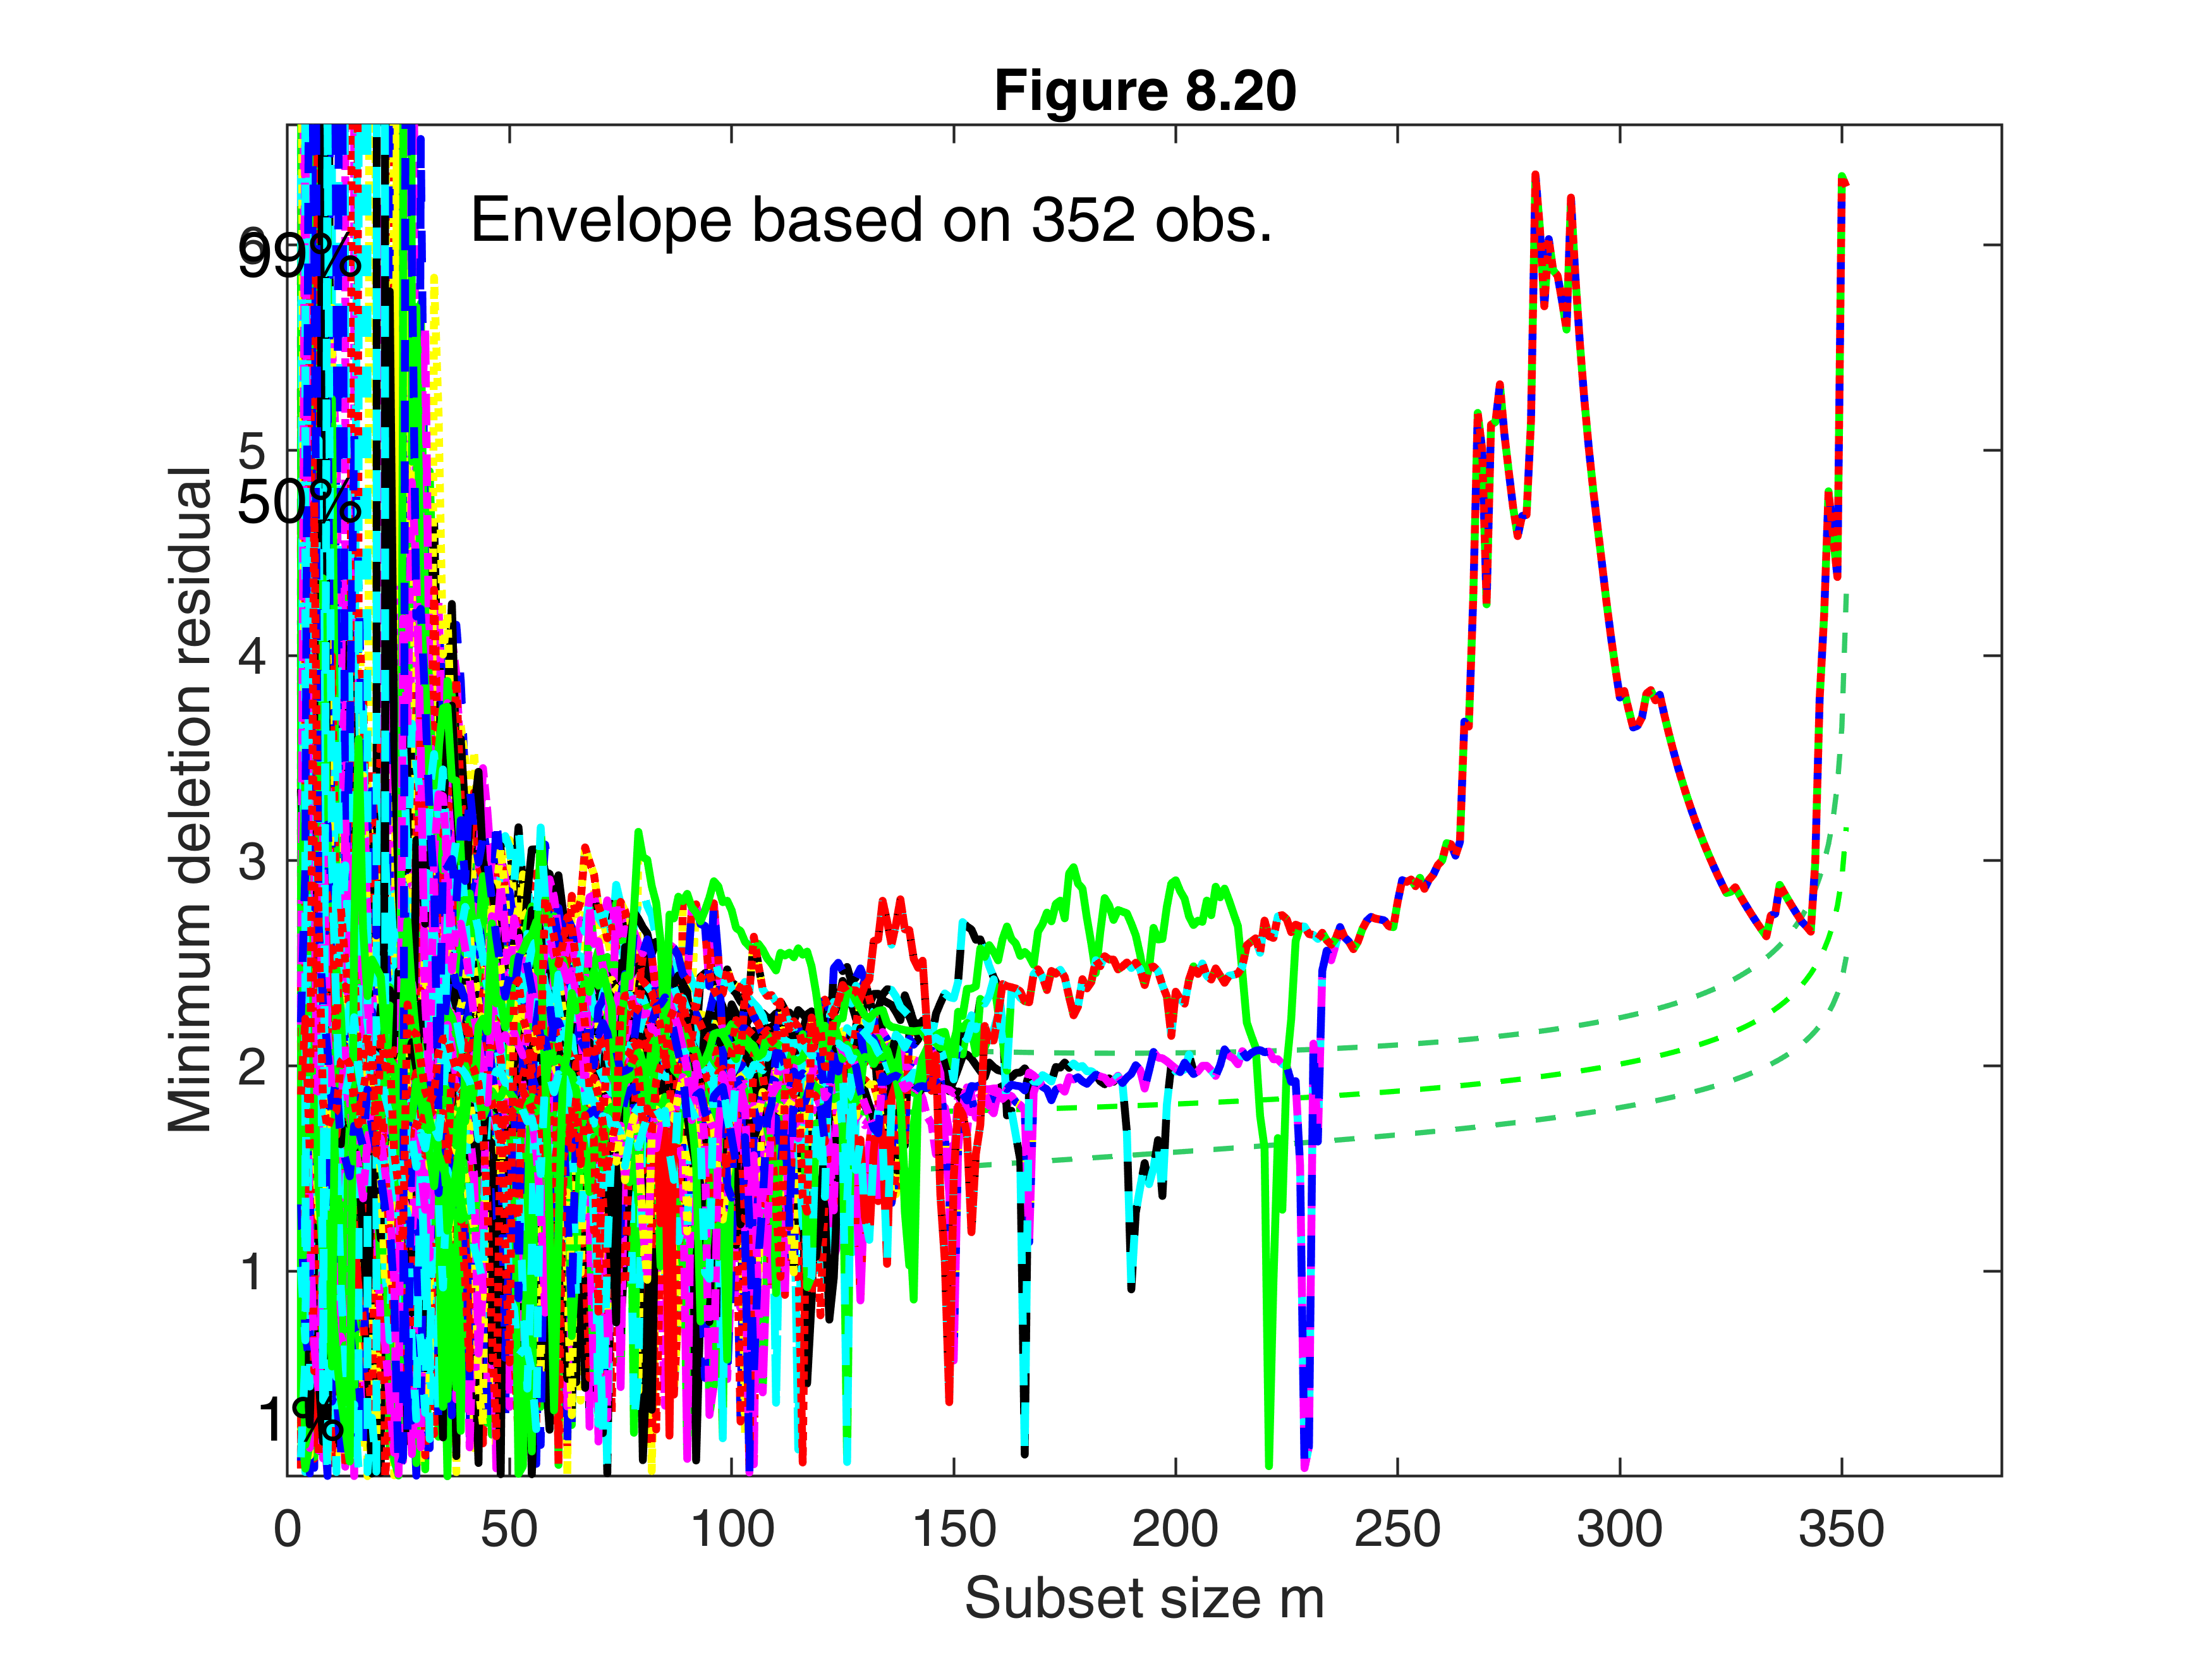

In [5]:
mdrrsplot(outFM0);
h_mdrrs=findobj(0,'Tag','pl_mdrrs');
figure(h_mdrrs(end))

set(gcf,'Name', 'Figure 8.20');
title('Figure 8.20')

In [6]:
drawnow;

## Figures 8.21 and 8.23 are created by facemaskInteractive.m
## Create Figure 8.22

Monitor estimated slope (just 1 explanatory variable)


In [7]:
X1=X(:,1);
init = 10;

bs1 = [1, 4, 8, 13, 14, 16, 17, 18, 29, 31]; % start from a second subset
[out2]=FSReda(y,X1,bs1,'init',init,'intercept',0);

m=100
m=200
m=300

In [8]:

bs2 = [5, 6, 11, 15, 19, 20, 24, 25, 26, 33]; % start from a subset
[out1]=FSReda(y,X1,bs2,'init',init,'intercept',0);

m=100
m=200
m=300

In [9]:

bs3 = [3, 5, 6, 10, 11, 15, 19, 20, 23, 24];
[out3]=FSReda(y,X1,bs3,'init',init,'intercept',0);

m=100
m=200
m=300


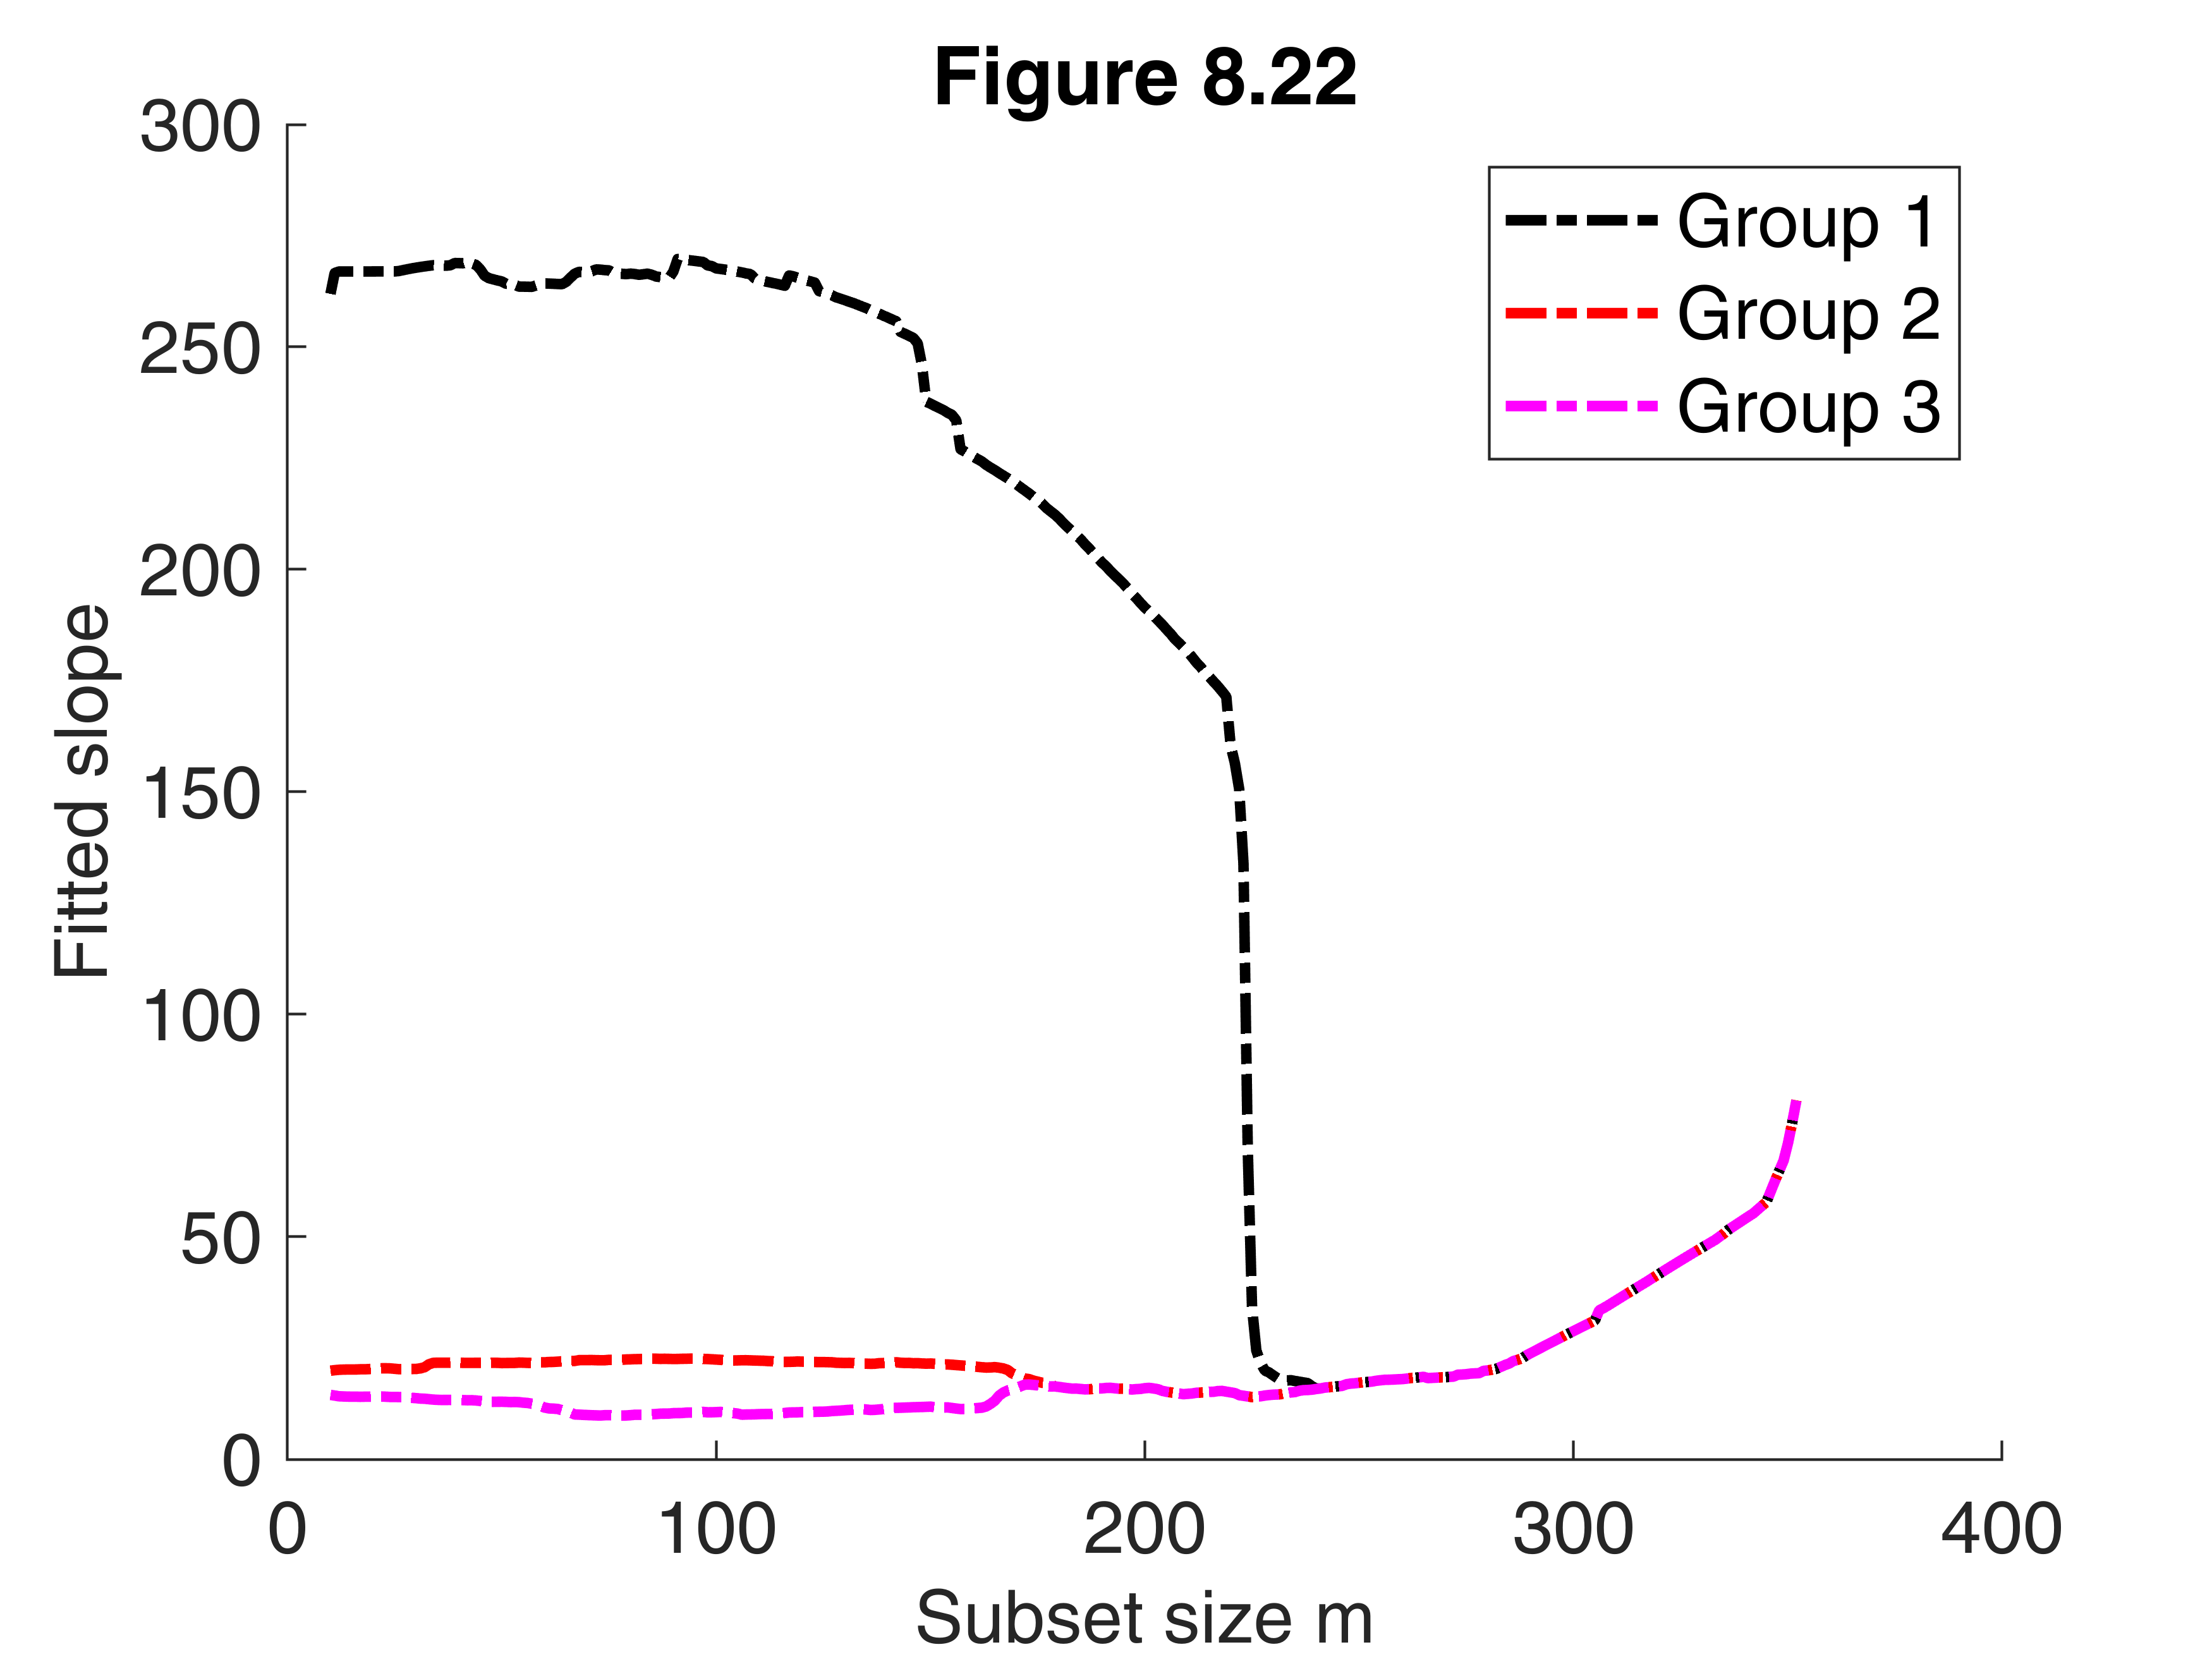

In [10]:

% ch8_a_0_is
lwd=2; fs=14;
figure;
hold on;
plot(init:n,out2.Bols(:,2),'-.k','LineWidth',lwd);
plot(init:n,out1.Bols(:,2),'-.r','LineWidth',lwd);
plot(init:n,out3.Bols(:,2),'-.m','LineWidth',lwd);
set(gca,'FontSize',fs)
xlabel('Subset size m','FontSize',fs);
ylabel('Fitted slope','FontSize',fs);
legend('Group 1' , 'Group 2', 'Group 3','FontSize',14)

set(gcf,'Name', 'Figure 8.22');
title('Figure 8.22')

## Create left panel of Figure 8.26

In [11]:
typeIC='MIXMIX';
alphaLik=0.10;
alphaX=0;
SpuriousSolutions=false;
rng(300)
nsamp=20000;
out = tclustregIC(y,X,'whichIC',typeIC,'alphaLik',alphaLik,'alphaX',alphaX, ...
    'kk',1:5,'nsamp',nsamp,'intercept',0,'plots',0);

k=1
k=2
k=3
k=4
k=5


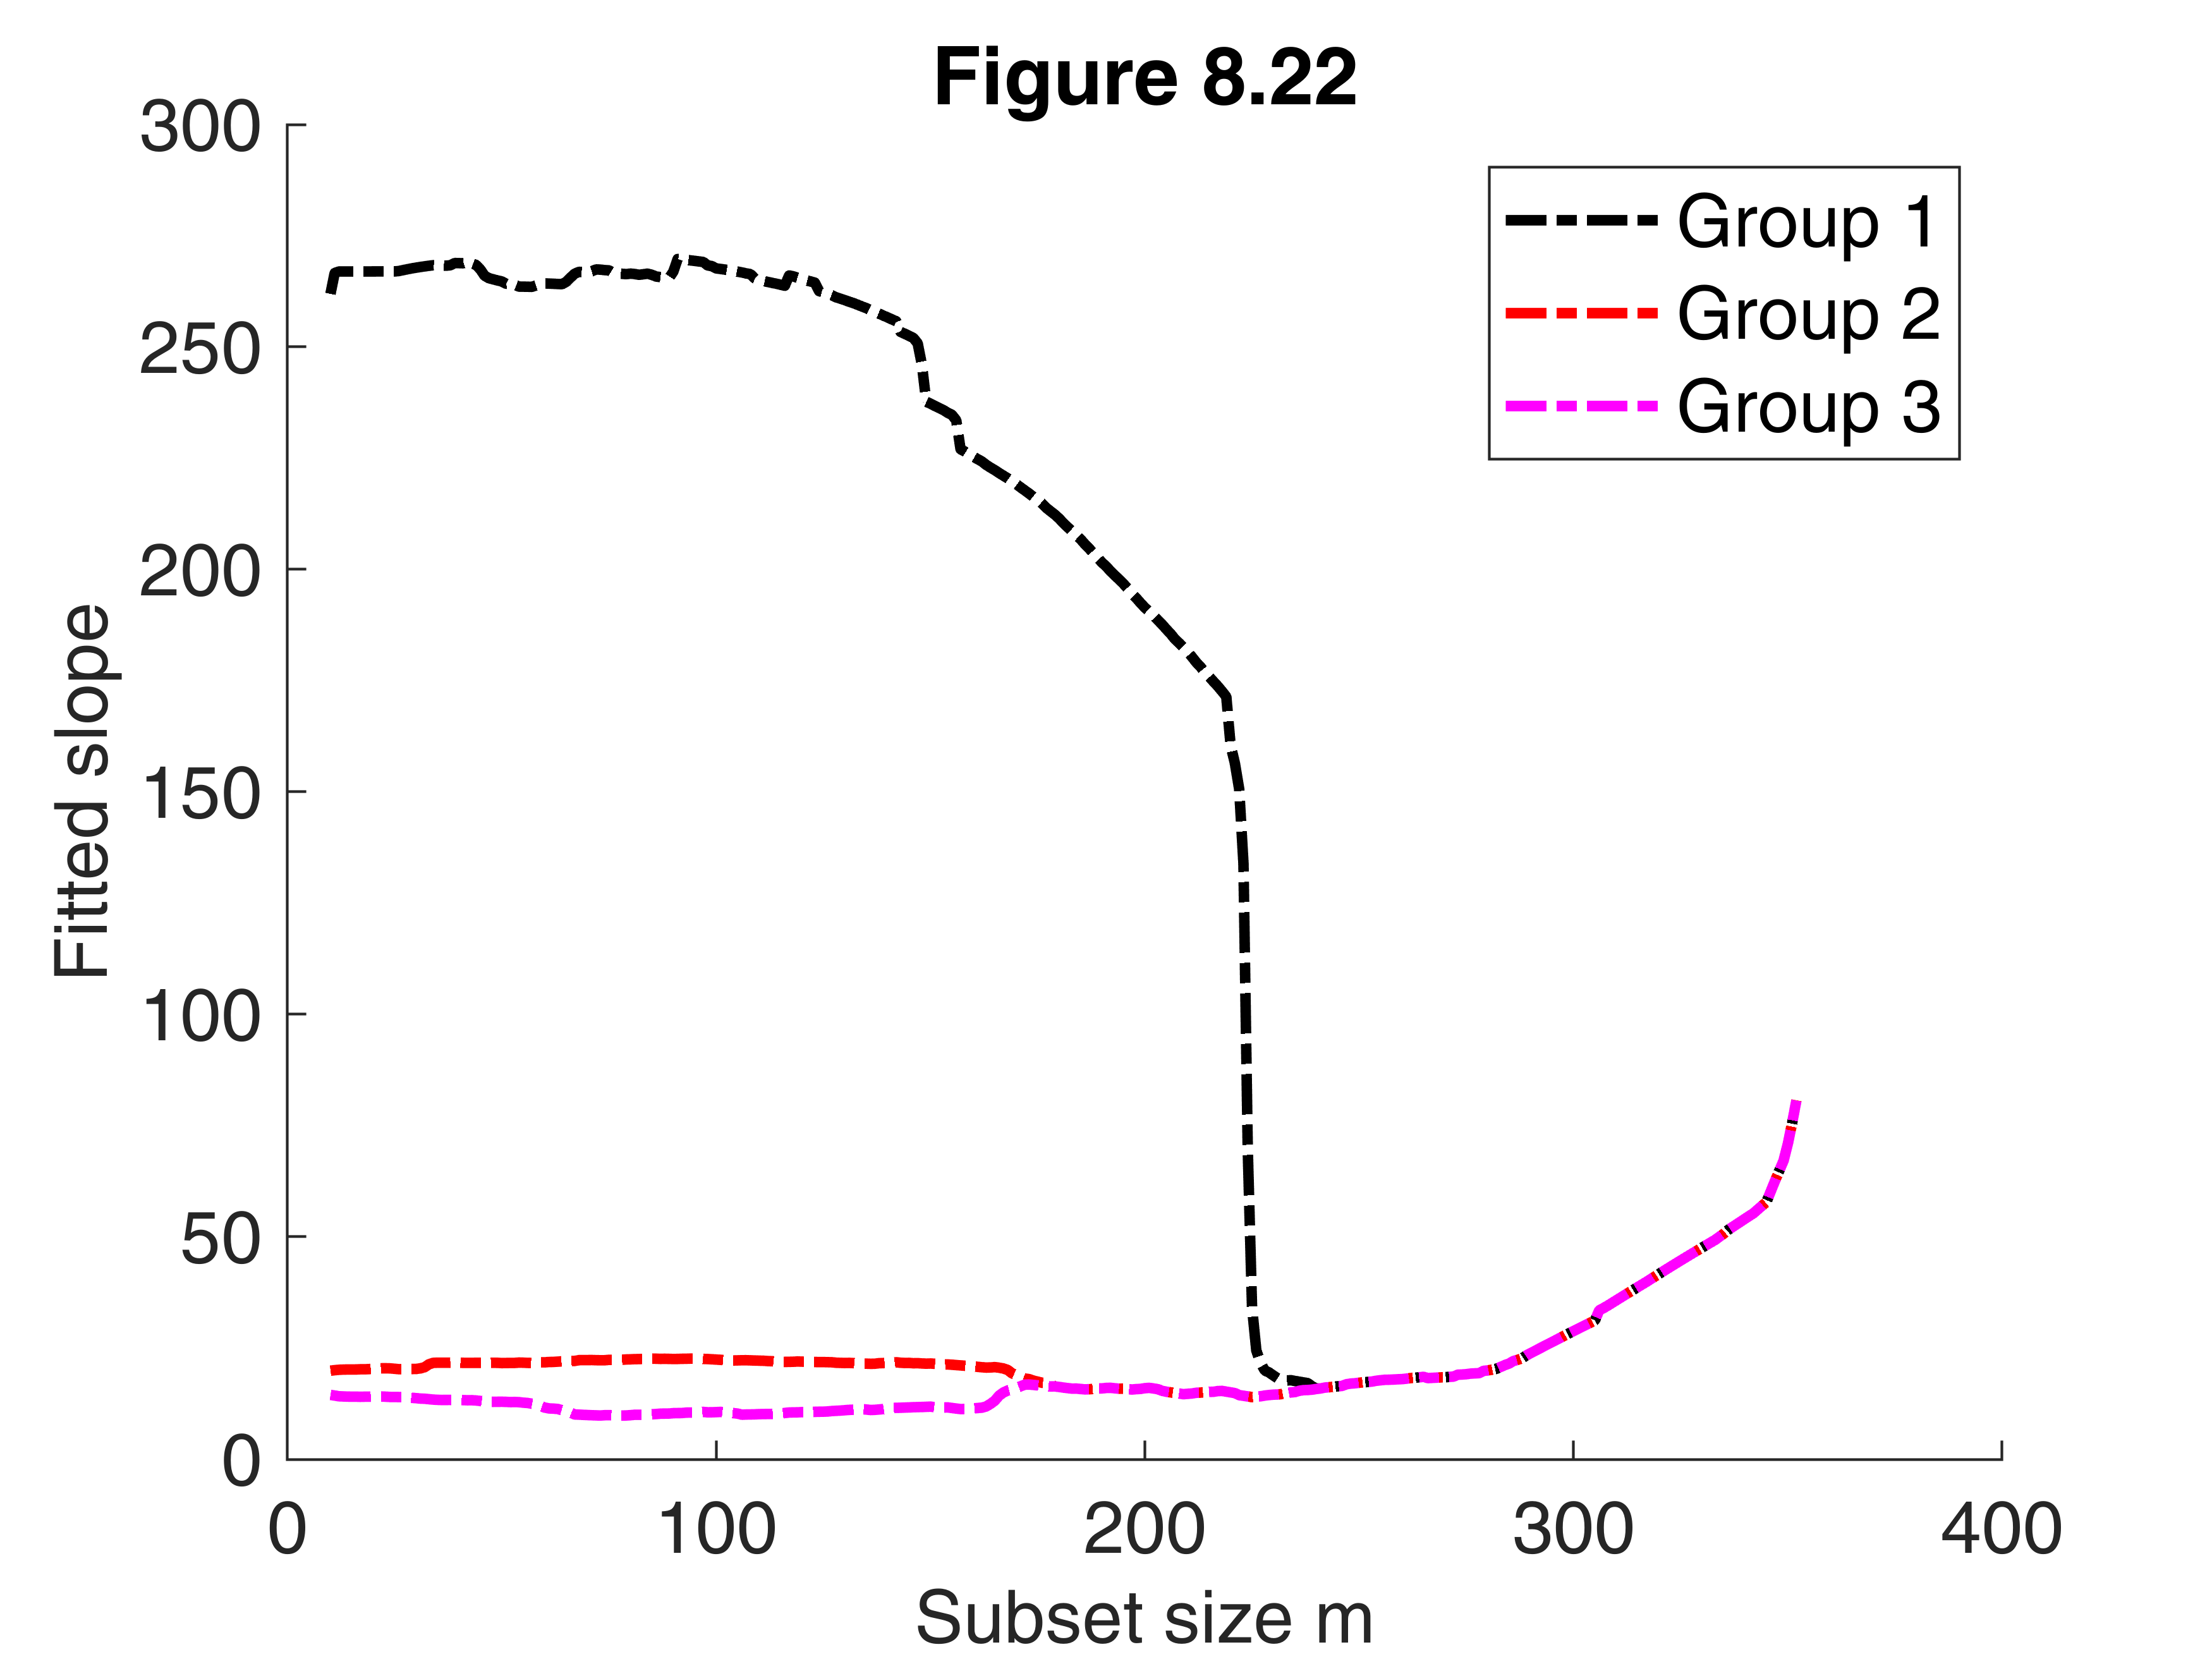

In [12]:
% Show the elbow plot
tclustICplot(out,'whichIC',typeIC);

<center>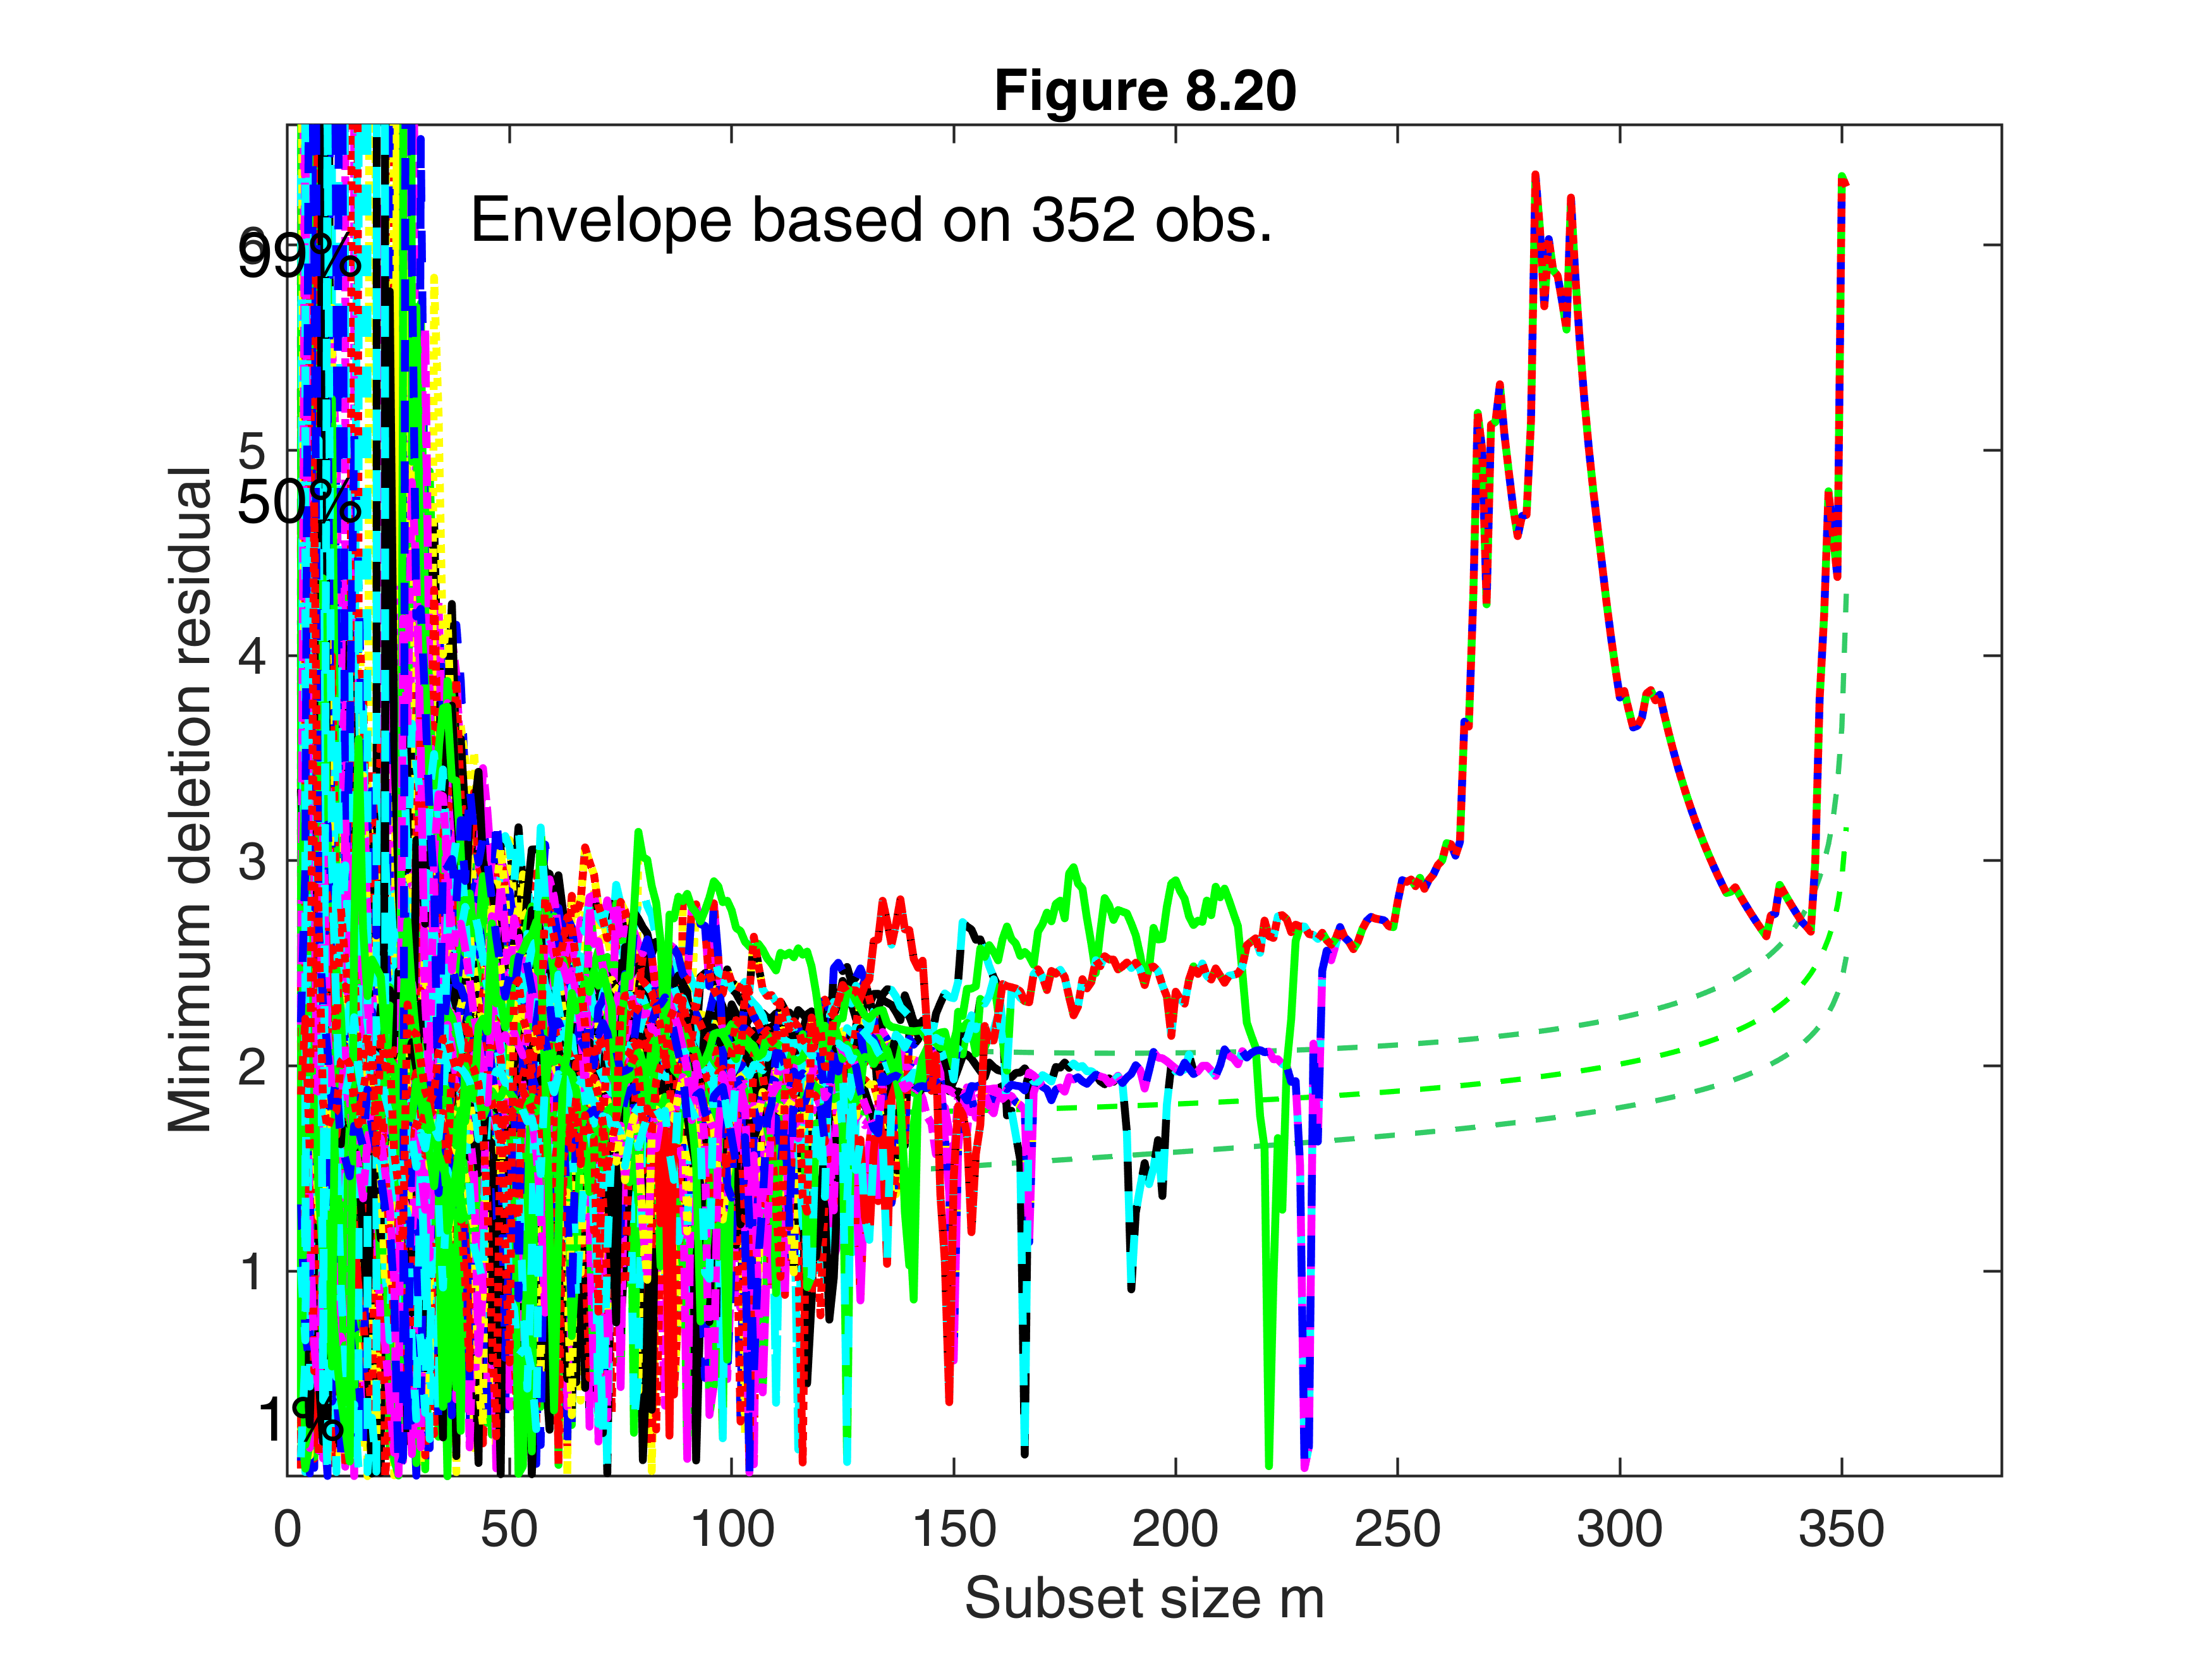</center>


<center>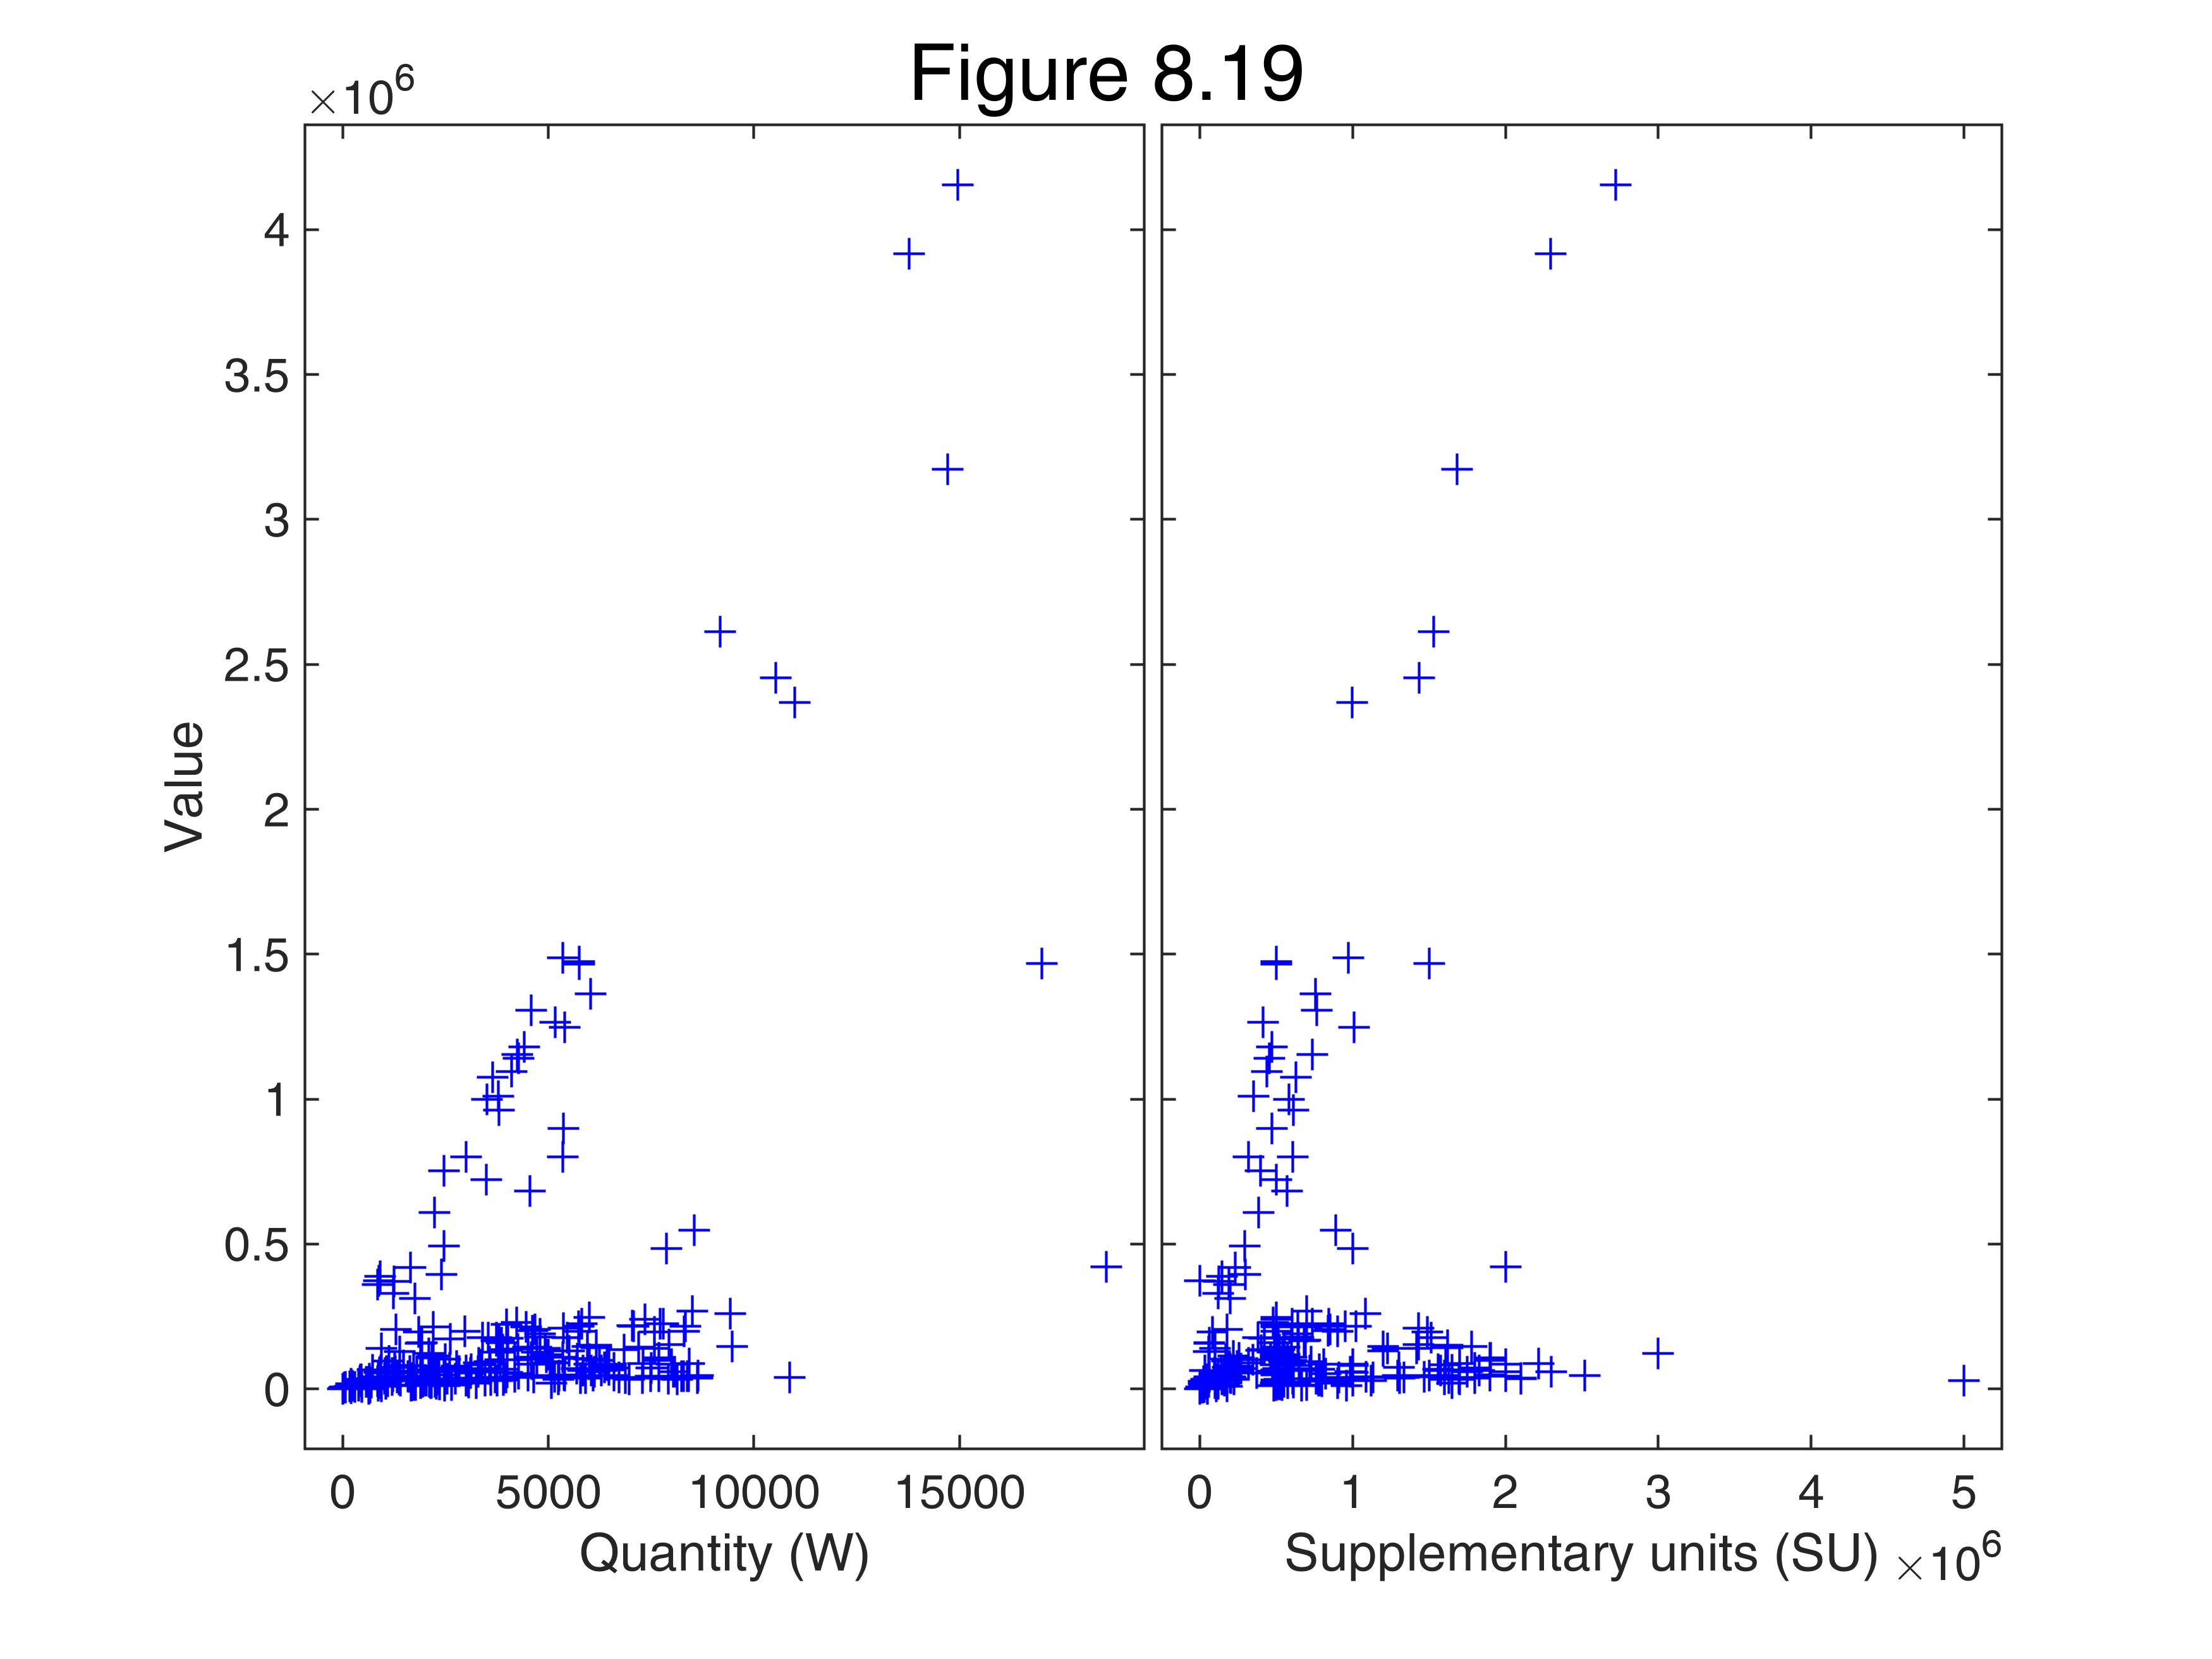</center>




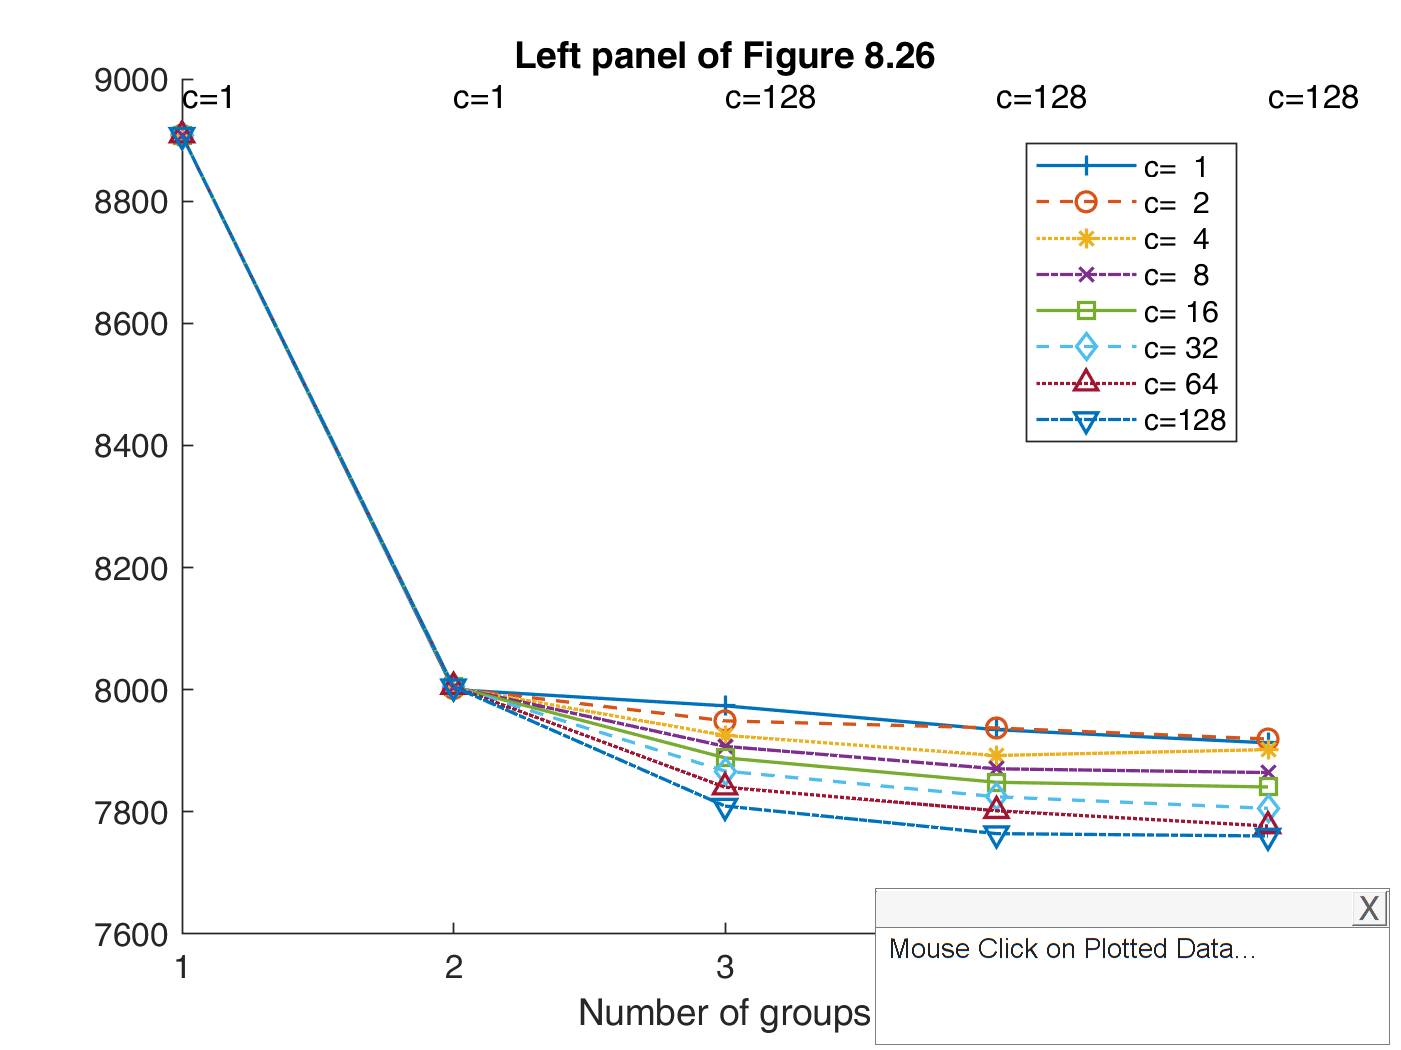

In [13]:
if prin==1
    % print to postscript
    print -depsc figures\C2a.eps;
end
h_MIXMIX=findobj(0,'Tag','pl_IC_MIXMIX');
figure(h_MIXMIX(end))
set(gcf,'Name', 'Left panel of Figure 8.26');
title('Left panel of Figure 8.26')

In [14]:
drawnow

## Create right panel of Figure 8.26

figure Find the best tentative solutions



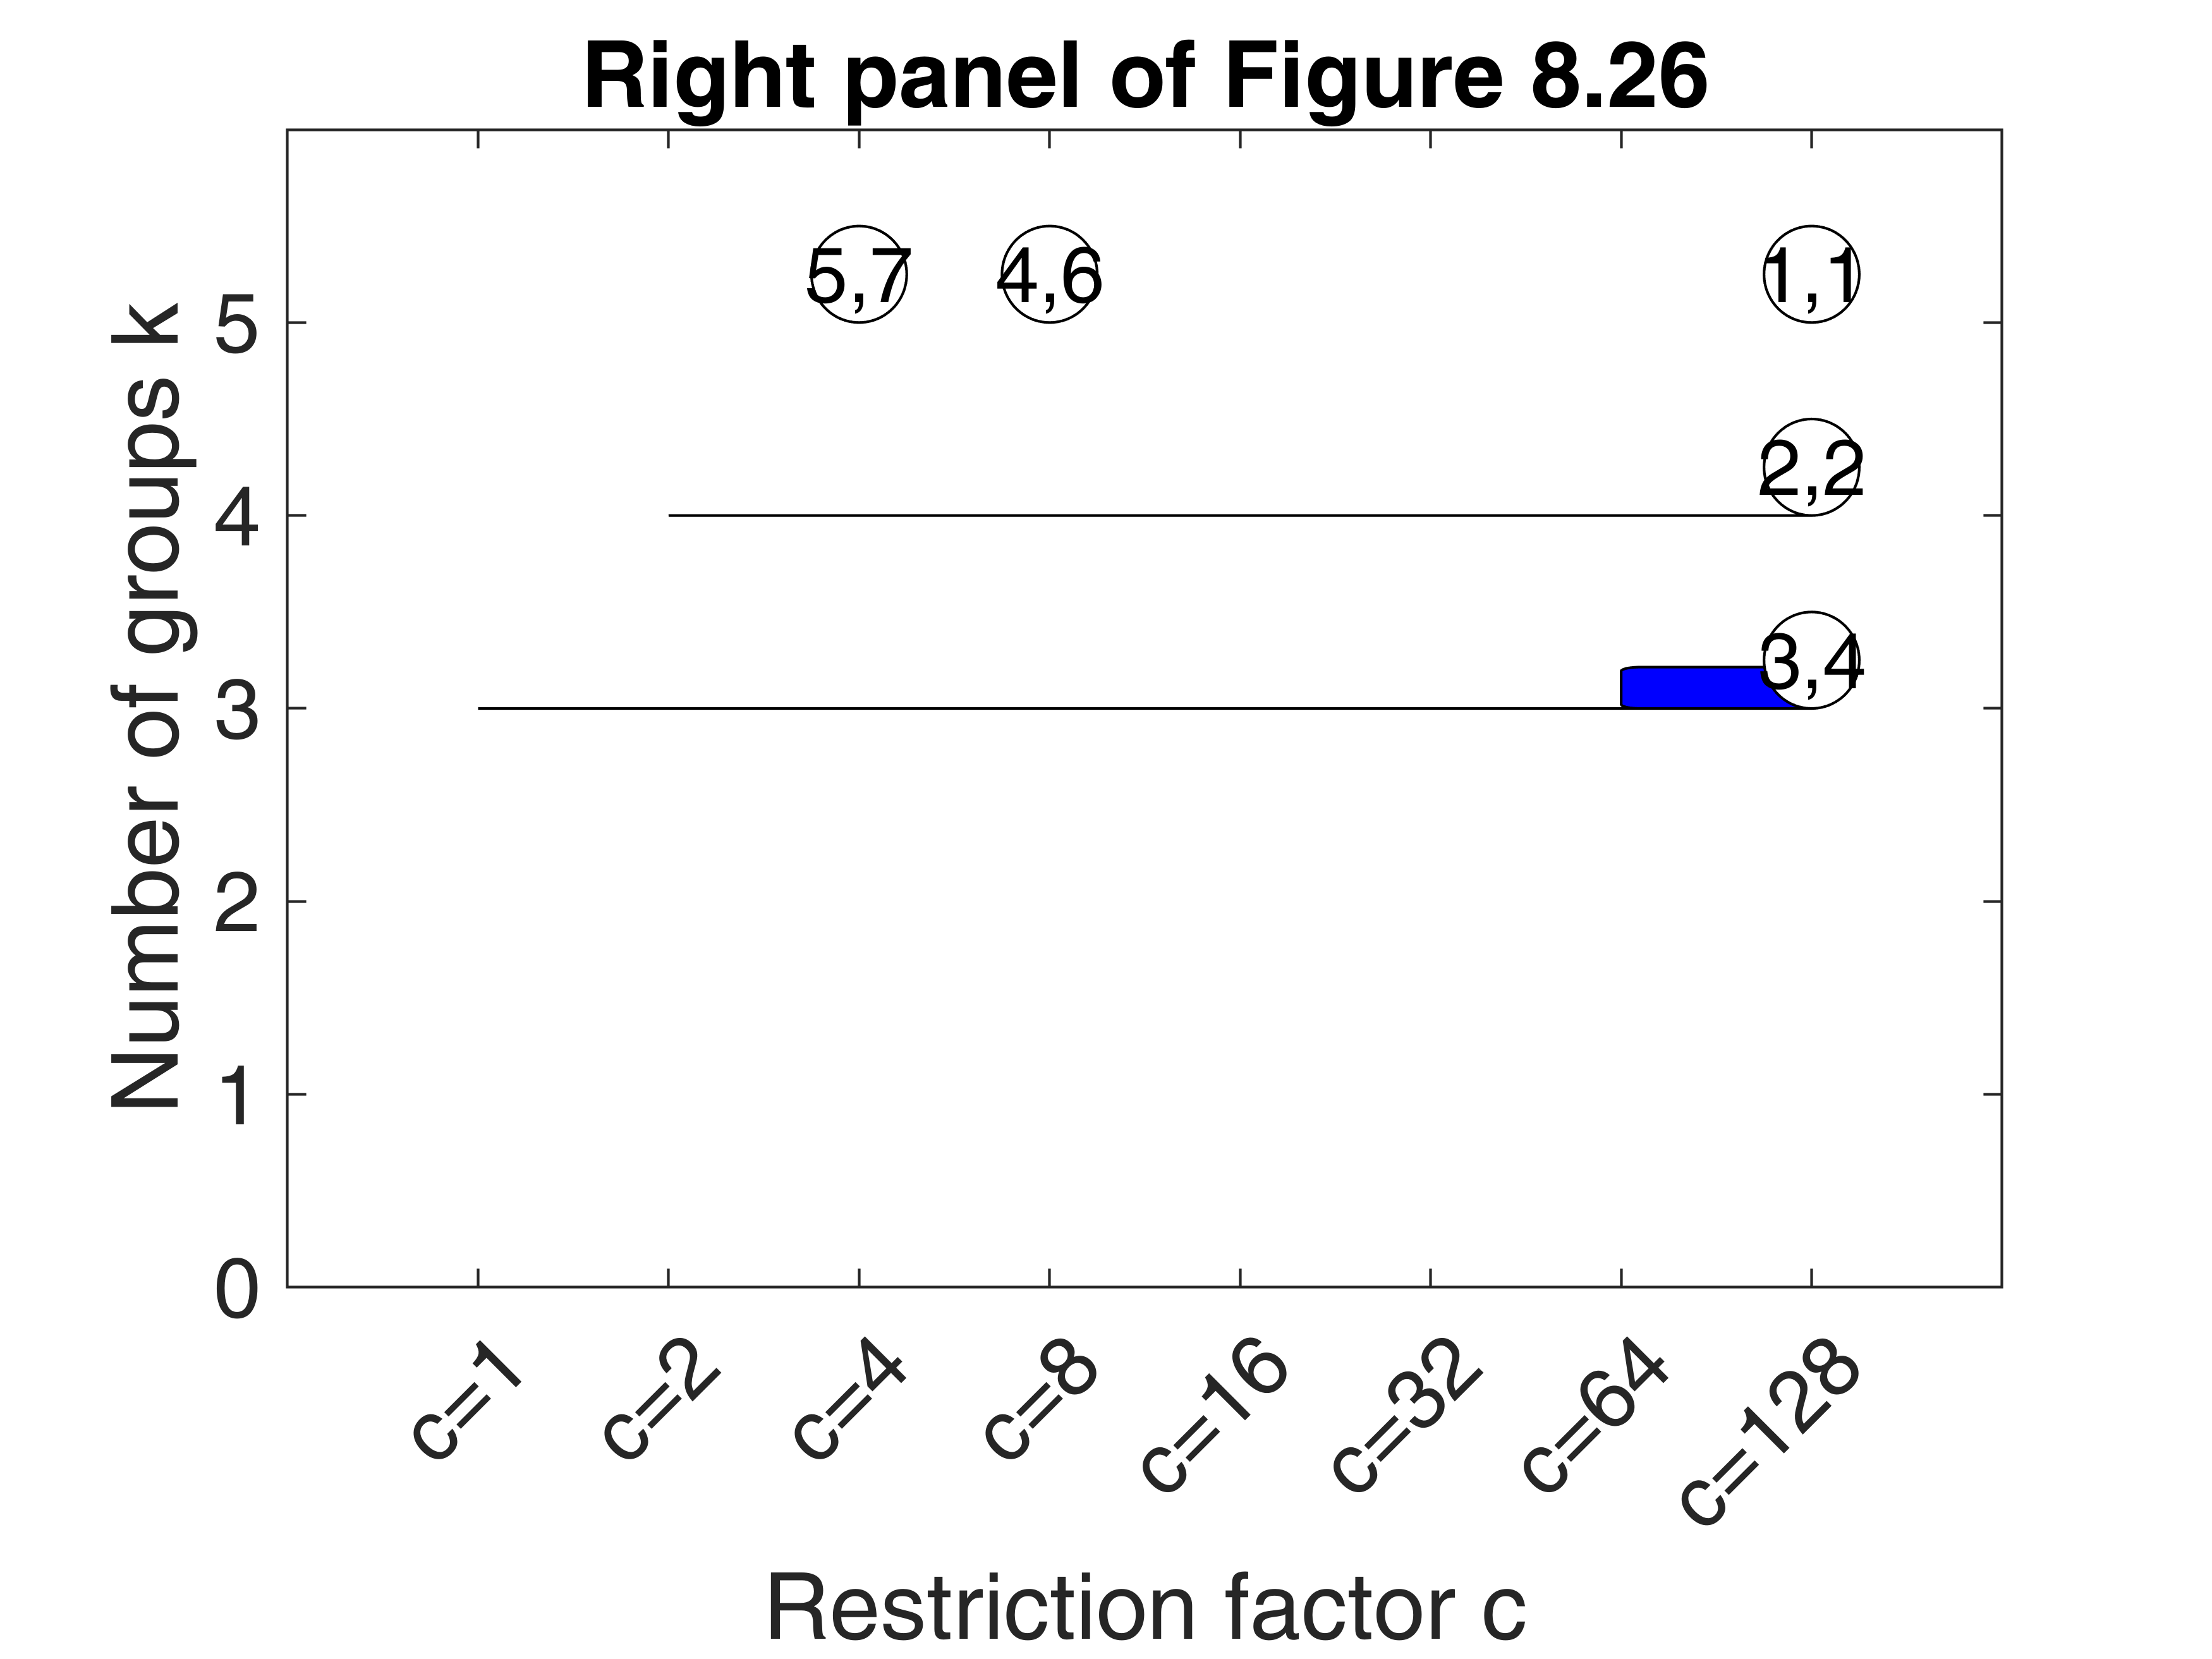

In [15]:
outICsol=tclustICsol(out,'whichIC',typeIC,'SpuriousSolutions',SpuriousSolutions, ...
    'NumberOfBestSolutions',7,'plots',0);
% Show the car-bike plot
carbikeplot(outICsol,'SpuriousSolutions',SpuriousSolutions);
if prin==1
    % print to postscript
    print -depsc figures\C2b.eps;
end

set(gcf,'Name', 'Right panel of Figure 8.26');
title('Right panel of Figure 8.26')

## Prepare input for Figure 8.27

In [16]:
rng(1)
alphaLik = (0.10:-0.01:0)' ;
alphaX = 0;
nsamp=50000;

% Prepare input for upper panel of Figure 8.27
% rng(100)
k=3;
restrfact =128;
out3 = tclustregeda(y,X,k,restrfact,alphaLik,alphaX,'intercept',false,'msg',1,'plots',0,'mixt',2,'nsamp',nsamp);

 82%[=========================================>         ]
 91%[=============================================>     ]
100%[===================================================]
Automatic relabelling not possible when alpha=0.09

In [17]:

rng(1)
restrfact =32;
% Prepare input for lower panel of Figure 8.27
k=4;
out4 = tclustregeda(y,X,k,restrfact,alphaLik,alphaX,'intercept',false,'msg',1,'plots',0,'mixt',2,'nsamp',nsamp);

MixLik with 
 82%[=========================================>         ]
100%[===================================================]
Automatic relabelling not possible when alpha=0

## Create Figure 8.27


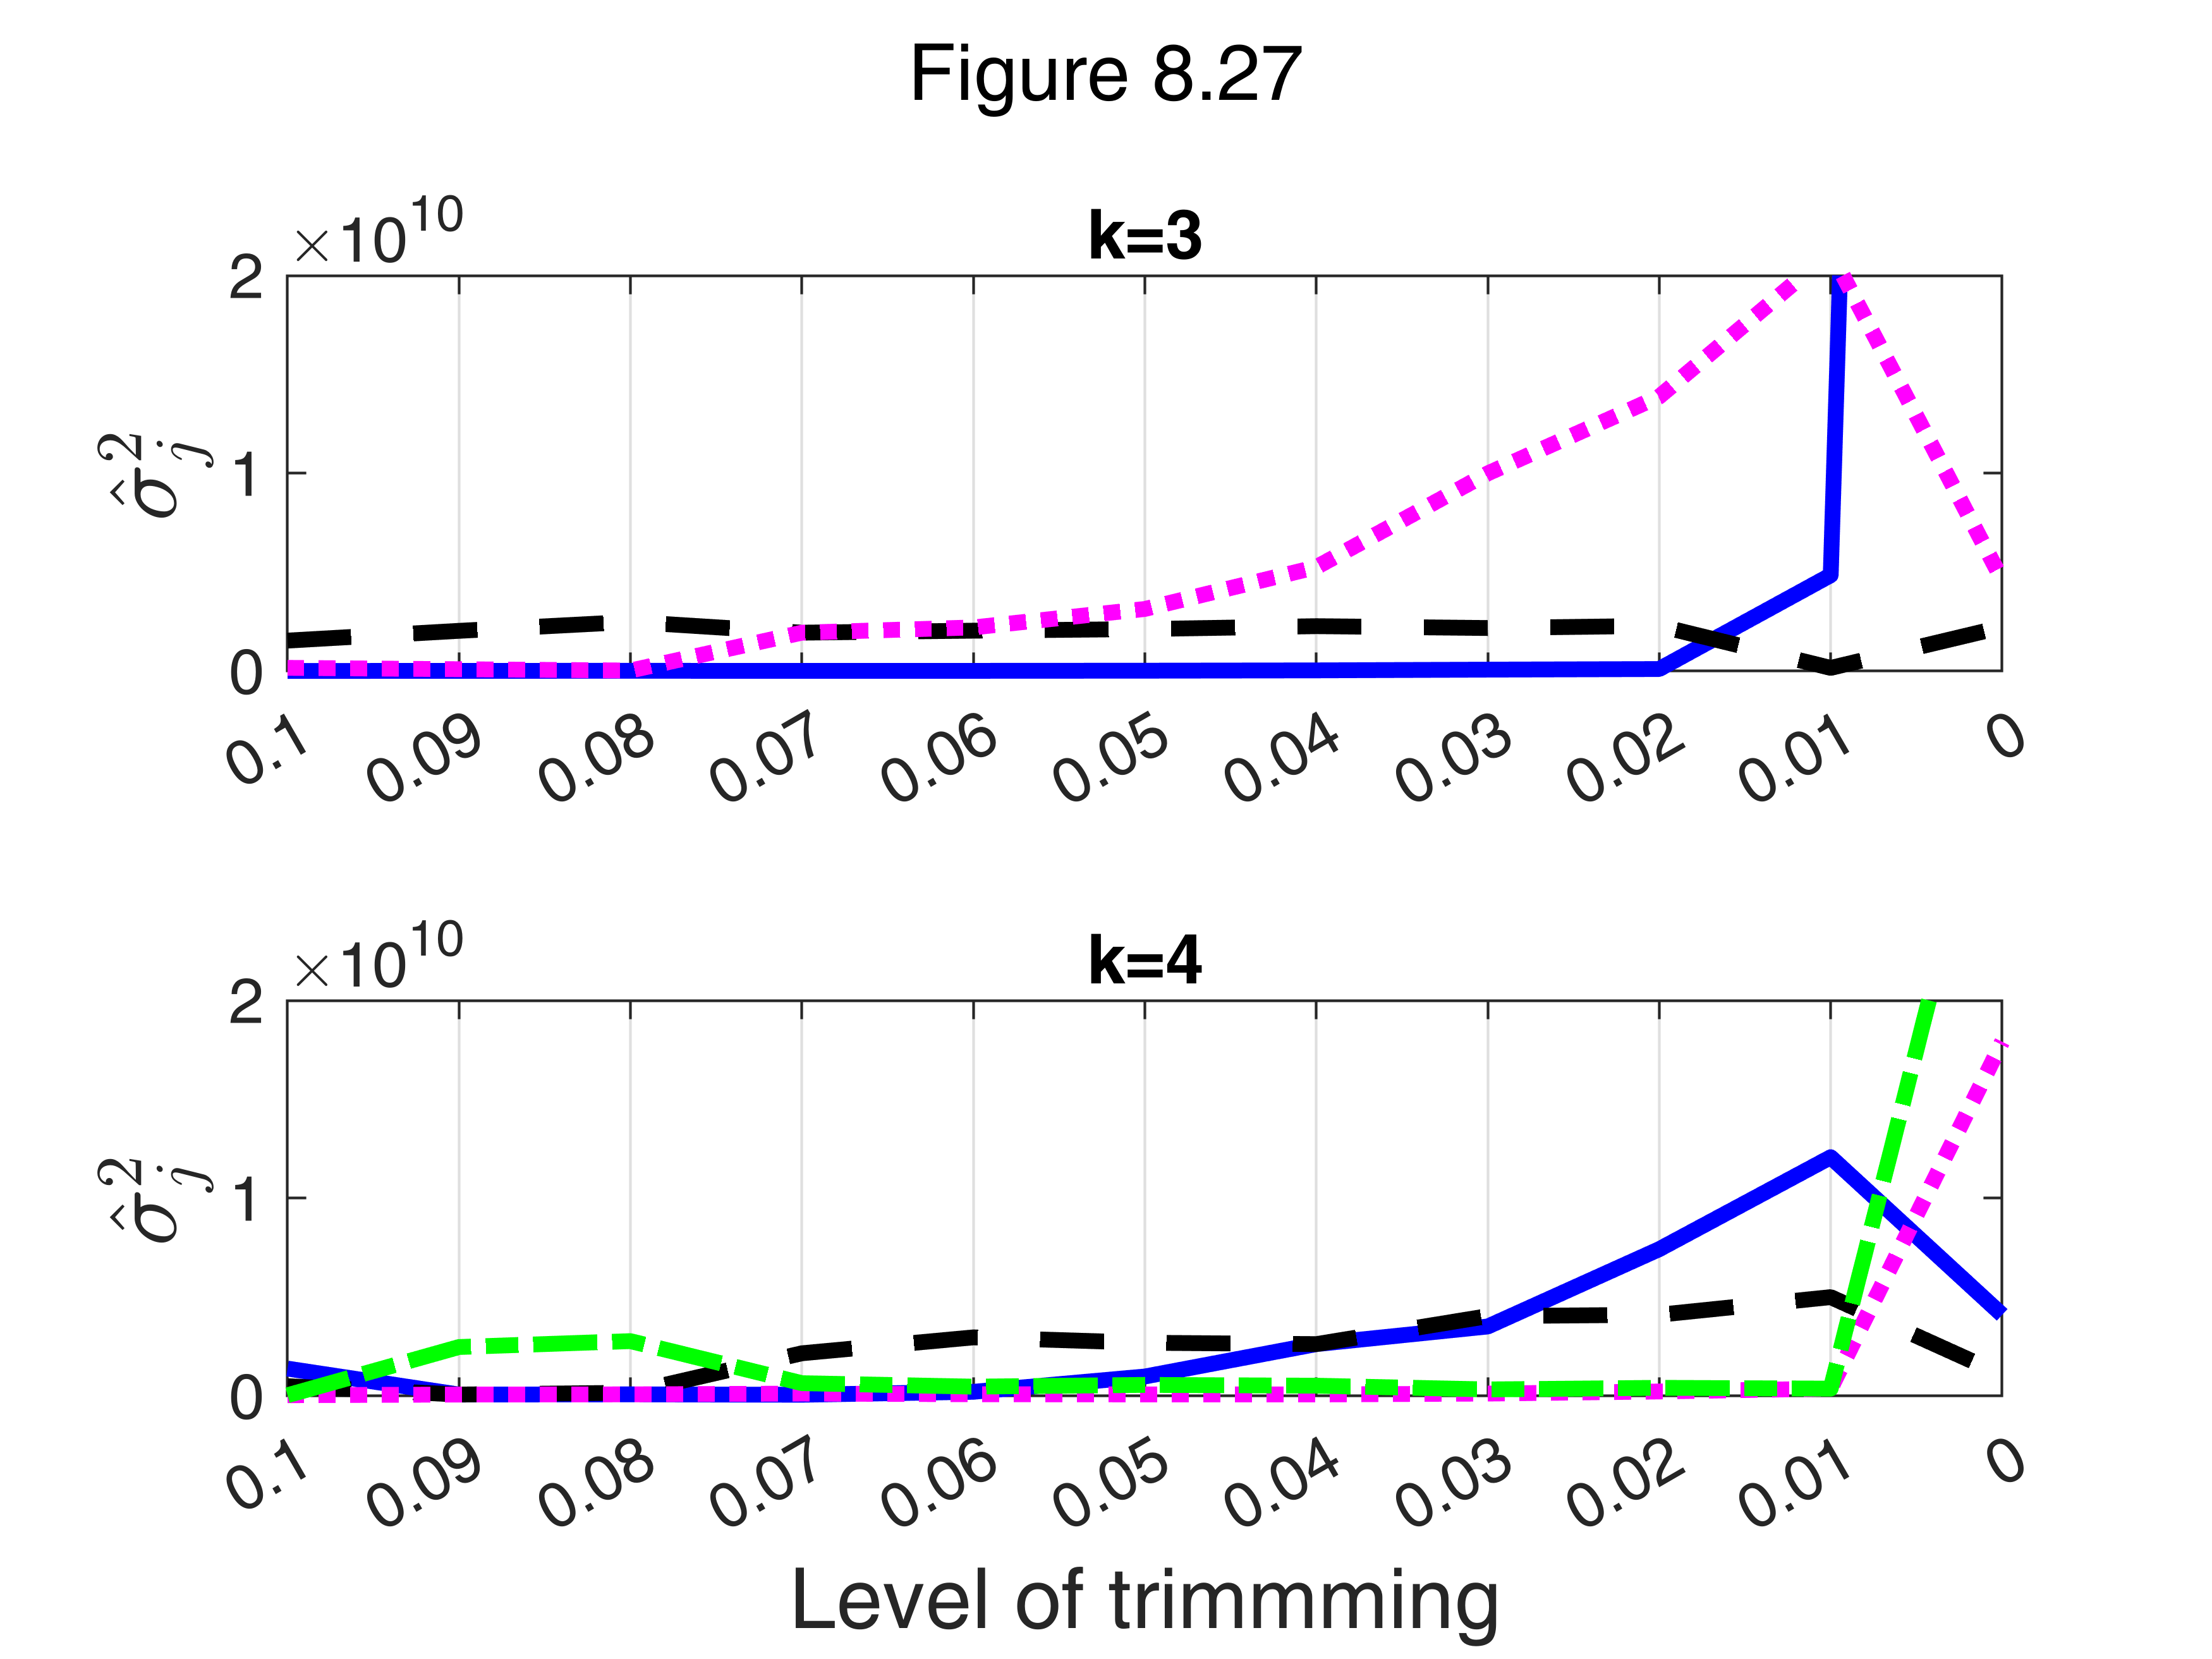

In [18]:
figure
plotLineWidth=3;
xyTickFontSize      = 12;
xyLabelSize         = 16;
yLabelLatexSize     = 18;
legendSize          = 14;
titleSize           = 18;
subtitleSize        = 16;
matrixFont          = 8;
clrdef = 'bkmgcrbkmgcrbkmgcrbkmgcrbkmgcrbkmgcrbkmgcr';
symdef = '+sd^v><phos+*d^v><phos+*d^v><phos+*d^v><phos';
linedef = {'-','--',':','-.'};
linedef=repmat(linedef,1,5);
k=3;
legendGroups=cellstr([repmat('Group ',k,1) num2str((1:k)')]);
lalpha   = length(alphaLik);

% first subplot
subplot(2,1,1);
% Sigma2y is k-by-length(alphaLik)
h1  = plot(alphaLik,out3.Sigma2y','LineWidth',plotLineWidth);
% set the colors and linestyle
set(h1,{'Color'},cellstr(clrdef(1:k)'),{'LineStyle'},linedef(1:k)',{'DisplayName'},legendGroups);

xlim([min(alphaLik),max(alphaLik)])
% set(gca,'XTickLabel',num2str(alpha1'))

L = get(gca,'XLim');
set(gca,'XTick',linspace(L(1),L(2),lalpha), 'FontSize' , xyTickFontSize);
set(gca,'XTickLabel',num2str(flipud(alphaLik)), 'FontSize' , xyTickFontSize);
set(gca,'XDir','reverse','XGrid','on');

% xlabel('Level of trimmming', 'FontSize' , xyLabelSize);
ylabel(' $\hat \sigma^2_j$ ','Interpreter','latex', 'FontSize' , yLabelLatexSize);
title('k=3')
ylim([0 2*10^10])

% second subplot
subplot(2,1,2);
k=4;
legendGroups=cellstr([repmat('Group ',k,1) num2str((1:k)')]);

h2  = plot(alphaLik,out4.Sigma2y','LineWidth',plotLineWidth);
% set the colors and linestyle
set(h2,{'Color'},cellstr(clrdef(1:k)'),{'LineStyle'},linedef(1:k)',{'DisplayName'},legendGroups);

xlim([min(alphaLik),max(alphaLik)]);
% set(gca,'XTickLabel',num2str(alpha1'))

L = get(gca,'XLim');
set(gca,'XTick',linspace(L(1),L(2),lalpha), 'FontSize' , xyTickFontSize);
set(gca,'XTickLabel',num2str(flipud(alphaLik)), 'FontSize' , xyTickFontSize);
set(gca,'XDir','reverse','XGrid','on');

xlabel('Level of trimmming', 'FontSize' , xyLabelSize);
ylabel(' $\hat \sigma^2_{j}$ ','Interpreter','latex', 'FontSize' , yLabelLatexSize);

axis('manual');
title('k=4')
ylim([0 2*10^10])

if prin==1
    % print to postscript
    print -depsc figures\C3.eps;
end

set(gcf,'Name', 'Figure 8.27');
sgtitle('Figure 8.27')

## Create left panel of Figure 8.28

Final classification with k=3


In [19]:
rng(1000)
k=3;
alpha1=0.04;
restrfact =128;
nsamp=10000;
out3final = tclustreg(y,X,k,restrfact,alpha1,alphaX,'intercept',false,'msg',1,'plots',0,'mixt',2,'nsamp',nsamp);

MixLik with untrimmed units selected using h largest lik contributions
Total estimated time to complete tclustreg: 12.89 seconds


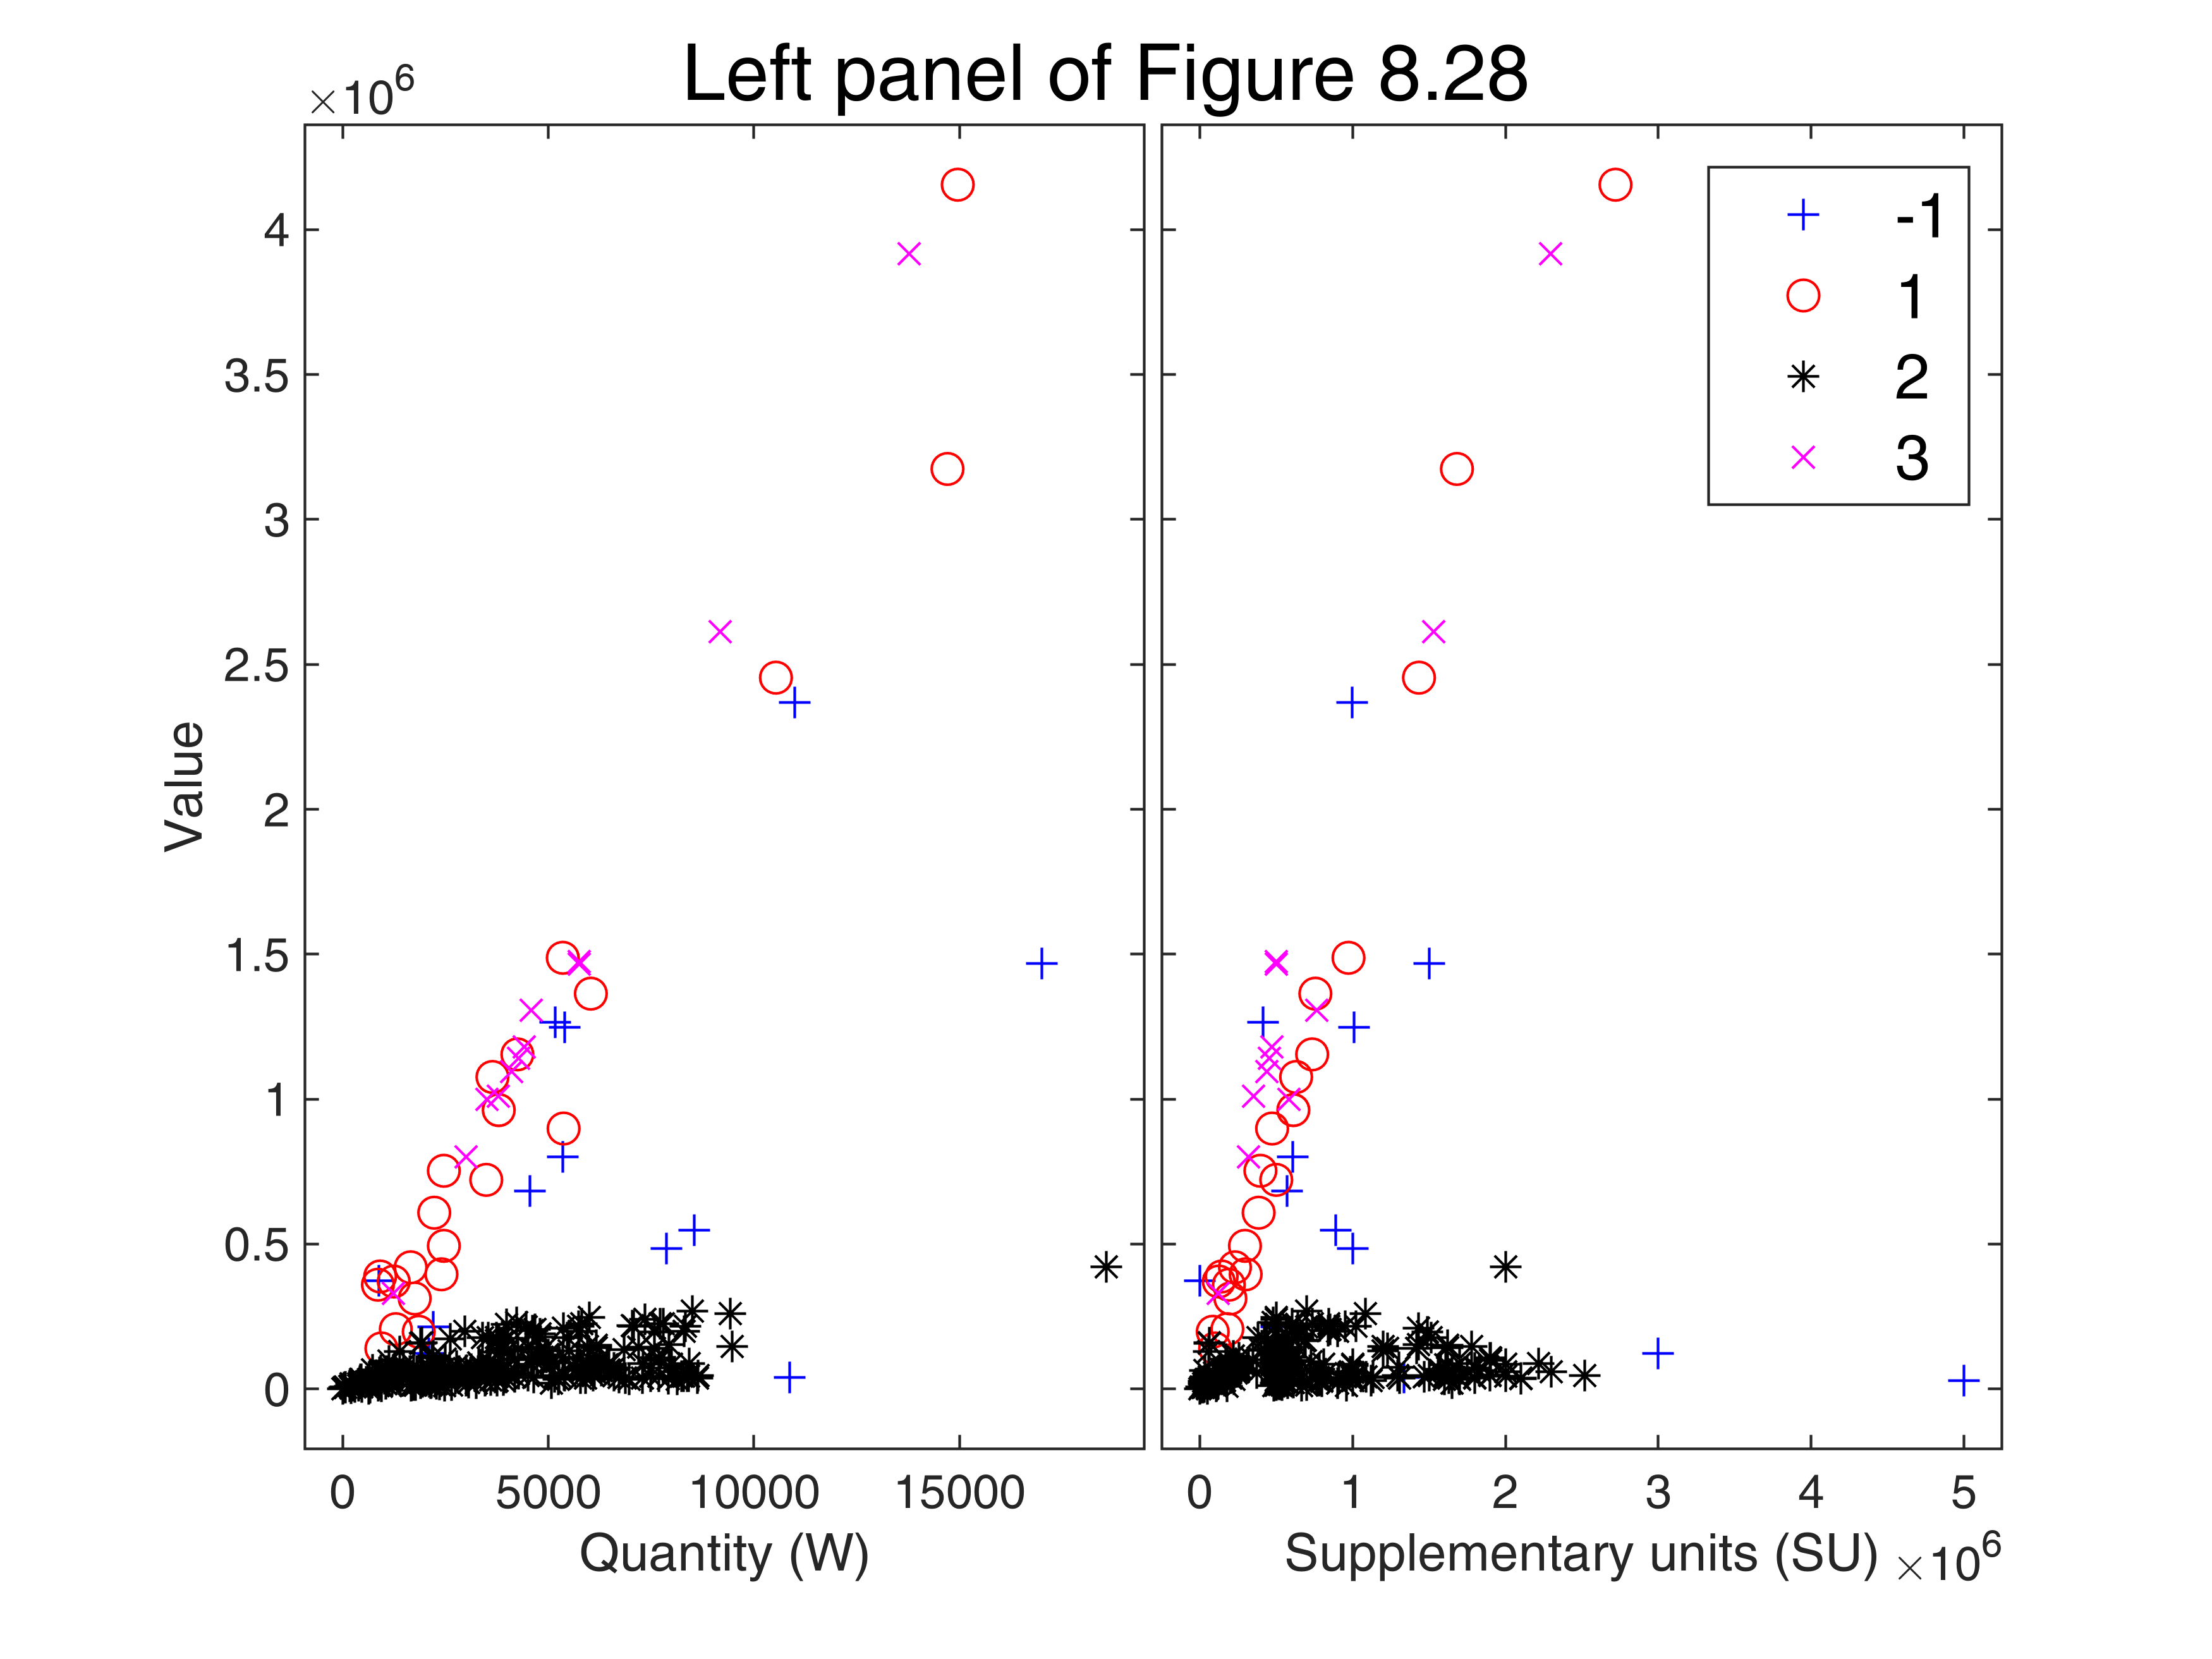

In [20]:
yXplot(y,X,'group',out3final.idx,'plo',plo,'tag','calk3');
if prin==1
    % print to postscript
    print -depsc figures\C4a.eps;
end
set(gcf,'Name', 'Left panel of Figure 8.28');
sgtitle('Left panel of Figure 8.28')

## Create right panel of Figure 8.28

Final classification with k=4;


In [21]:
rng(2000)
plo=struct;
plo.namey='Value';
plo.nameX={'Quantity', 'Supplementary units'};

k=4;
alpha1=0.03;
restrfact =32;
out4final = tclustreg(y,X,k,restrfact,alpha1,alphaX,'intercept',false,'msg',1,'plots',0,'mixt',2,'nsamp',nsamp);

MixLik with untrimmed units selected using h largest lik contributions
Total estimated time to complete tclustreg: 18.58 seconds


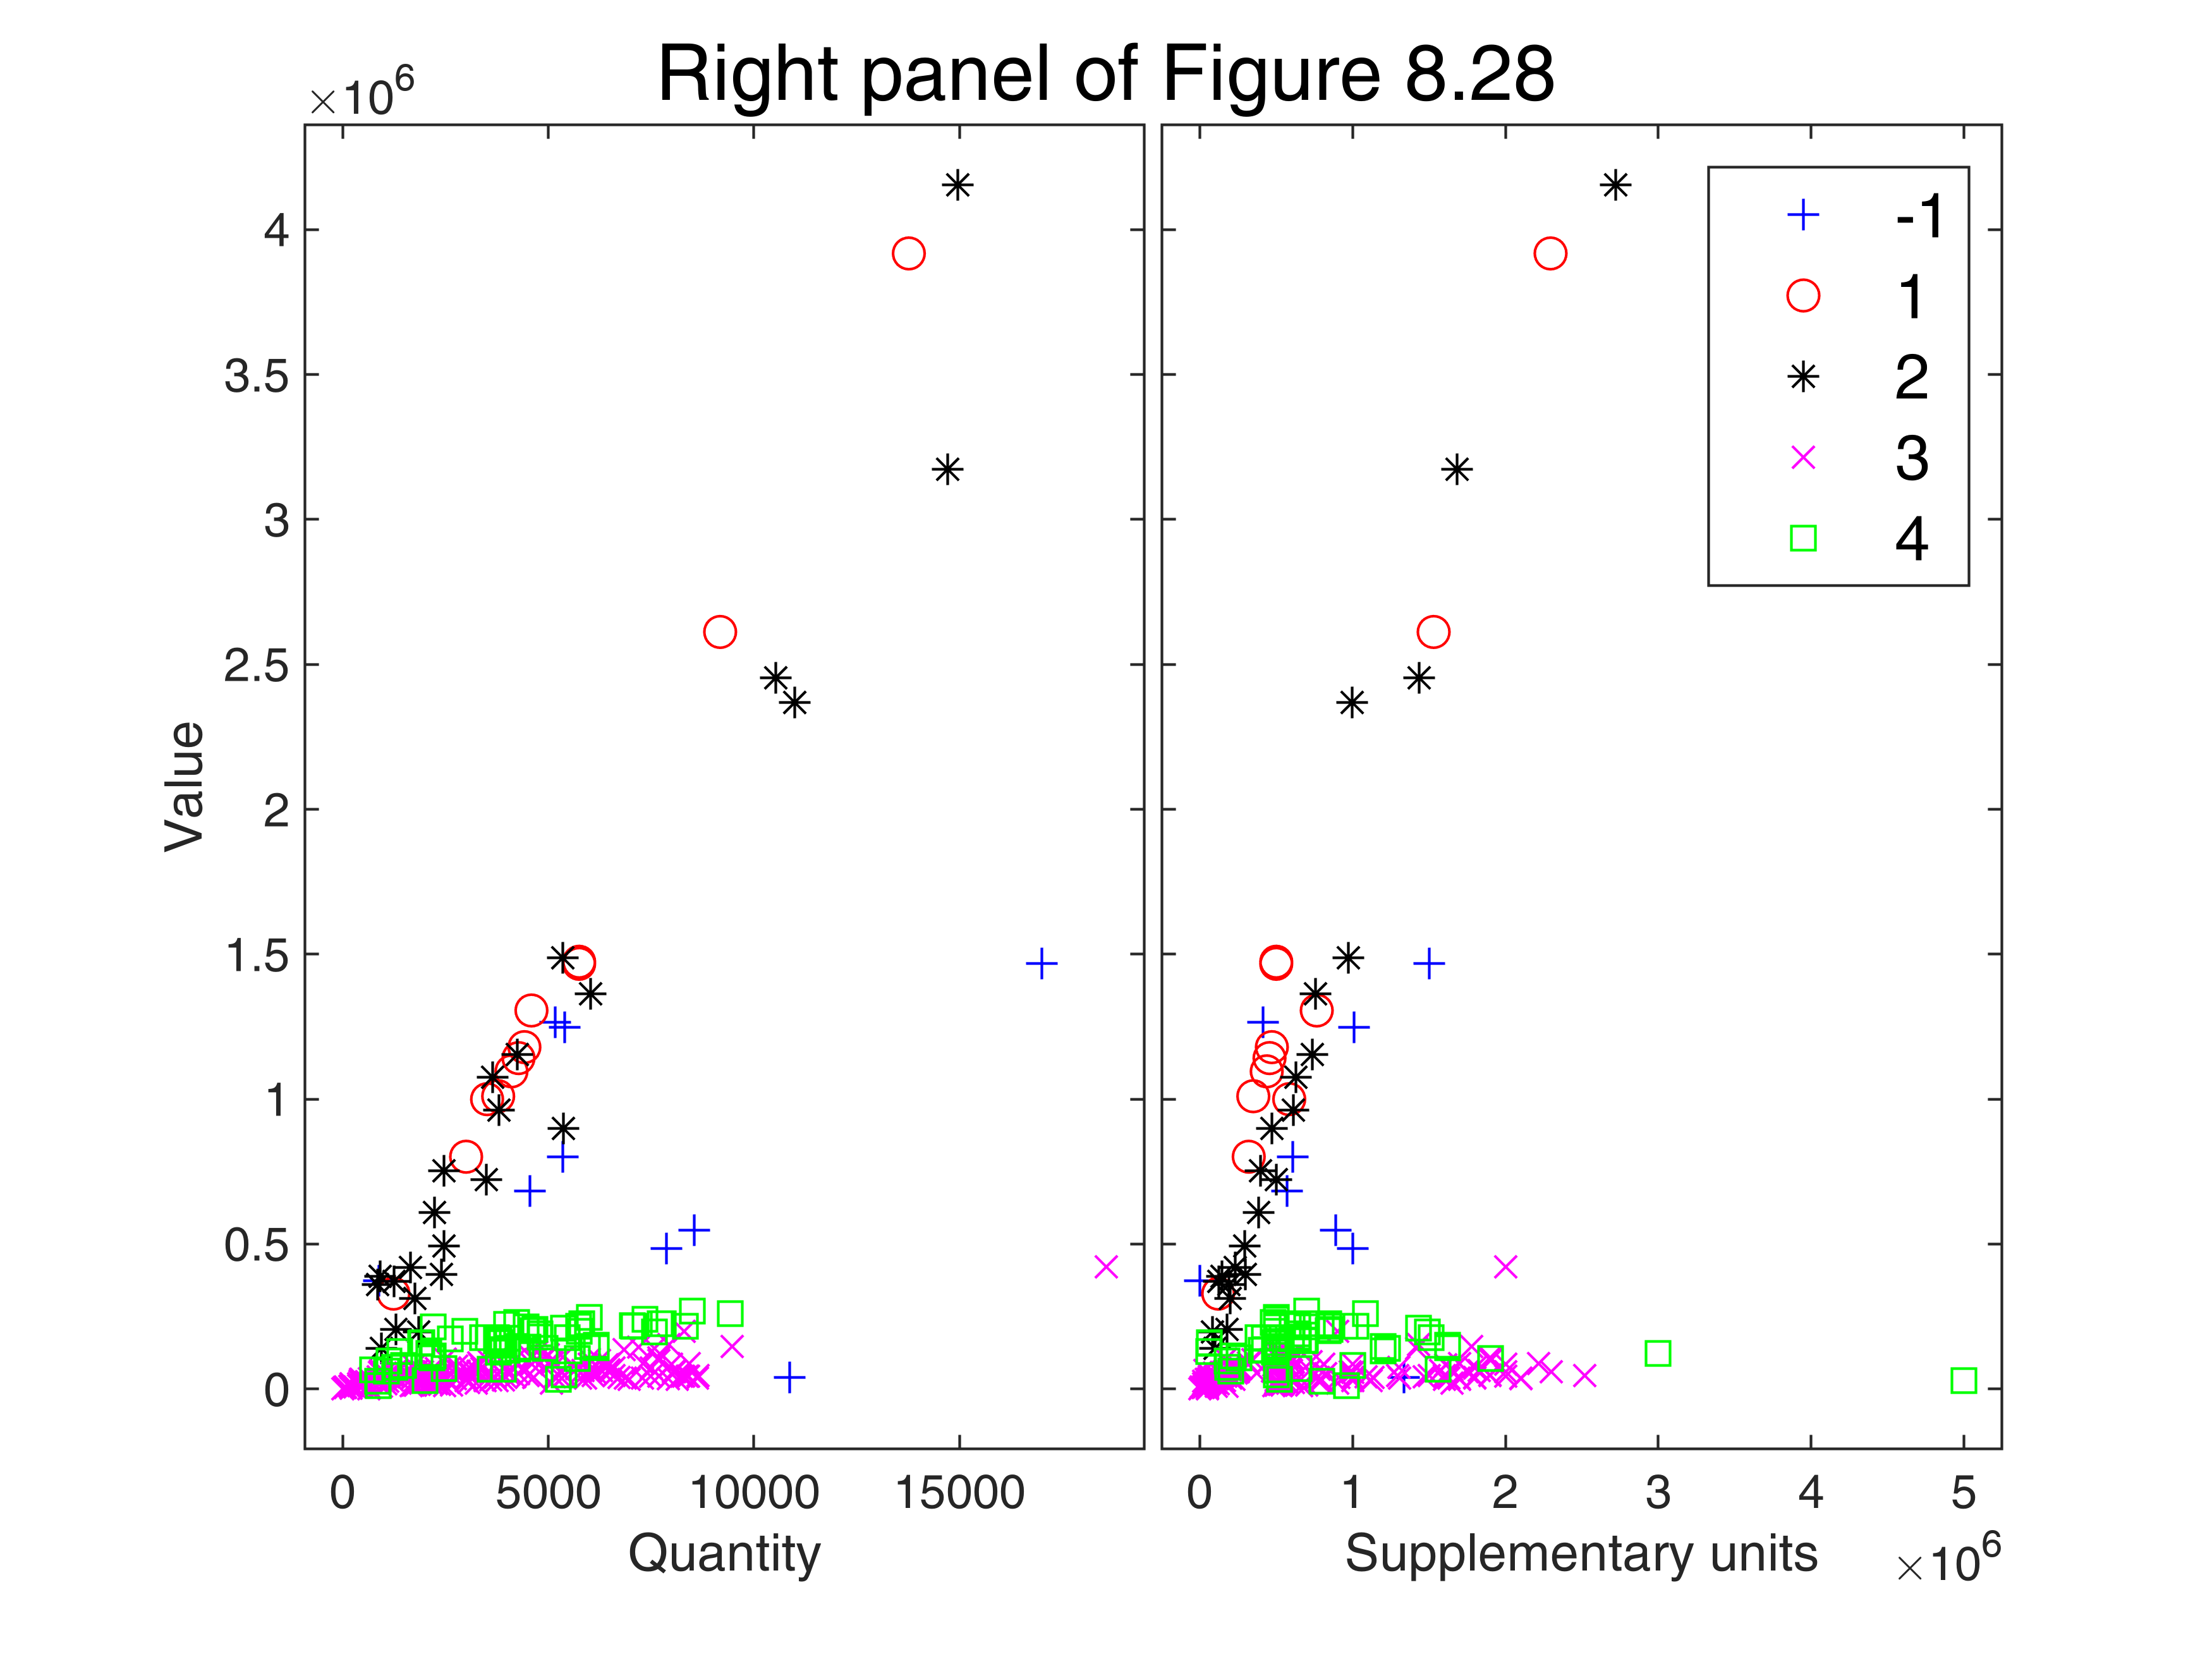

In [22]:
yXplot(y,X,'group',out4final.idx,'plo',plo,'tag','calk4');
if prin==1
    % print to postscript
    print -depsc figures\C4b.eps;
end

set(gcf,'Name', 'Right panel of Figure 8.28');
sgtitle('Right panel of Figure 8.28')

## Create tables with coefficients and sample sizes

In [23]:
Final3=[out3final.bopt; out3final.siz(2:end,2)'];
nam=["b1" "b2" "nj"];
Final3T=array2table(Final3,"RowNames",nam,"VariableNames","Group"+[2 1 3]);
Final3T=Final3T(:,[2 1 3]);
disp(Final3T)

           Group1      Group2    Group3 
          _________    ______    _______
    b1        33.54    86.911      233.3
    b2    -0.081107    1.0627    0.30838
    nj          262        43         33

In [24]:

Final4=[out4final.bopt; out4final.siz(2:end,2)'];
nam=["b1" "b2" "nj"];
Final4T=array2table(Final4,"RowNames",nam,"VariableNames","Group"+[3 4 2 1]);
Final4T=Final4T(:,[3 4 2 1]);
disp(Final4T)

           Group2       Group1      Group4     Group3 
          ________    __________    _______    _______
    b1      29.273        31.574     114.19     233.25
    b2    -0.07751    -0.0088539    0.89729    0.30885
    nj         200            65         44         33

## Compute adjusted R2 for the groups

In [25]:
R2all=zeros(4,4);

idx3=out3final.idx;
for j=1:3
    out3=fitlm(X(idx3==j,:),y(idx3==j));
    R2all(j,1)=out3.Rsquared.Adjusted;
end

idx4=out4final.idx;

for j=1:4
    out4=fitlm(X(idx4==j,:),y(idx4==j));
    R2all(j,2)=out4.Rsquared.Adjusted;
end

% % Comparision with results from R packages
% load IDXpunzo
% idx4p=punzo_cl_k4;
% tabulateFS(idx4p)
% load IDXleisch
% idx4l=leisch_cl;
%
% % third column punzo fourth column fliesch
% for j=1:4
% out4=fitlm(X(idx4p==j,:),y(idx4p==j));
% R2all(j,3)=out4.Rsquared.Adjusted;
%
% if j<4
% out4=fitlm(X(idx4l==j,:),y(idx4l==j));
% R2all(j,4)=out4.Rsquared.Adjusted;
% end
%
% end
%
% for j=1:4
%     R2all(:,j)=sort(R2all(:,j),'descend');
% end

%InsideREADME